# Shapley feature importance
## Seatpos datasets analysis

In [ ]:
from google.colab import files
uploaded = files.upload() # choose the seatpos_data.csv dataset

In [ ]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
import time

start_time = time.time()
print("\nIterating over rows using iloc function :\n")
data = pd.read_csv("seatpos_data.csv")
df1 = pd.DataFrame(data,columns=['Age','Weight','HtShoes','Ht','Seated','Arm','Thigh','Leg','hipcenter'])
df = pd.DataFrame(data,columns=['Age','Weight','HtShoes','Ht','Seated','Arm','Thigh','Leg'])
#print(df)
r_squared_res=[]
perm_res=[]
for i in range(1,8):
    combi = combinations(df, r = i)
    for c in list(combi):
        X = pd.DataFrame(data, columns = c)
        Y = df1['hipcenter']
        X = sm.add_constant(X) # adding a constant
        model = sm.OLS(Y, X).fit()
        predictions = model.predict(X)
        print_model = model.summary()
        #print(print_model)
        r_squared_res.append(model.rsquared)
        perm_res.append(c)

d = {'Feature_name':perm_res,'r_squared':r_squared_res}
dataframe=pd.DataFrame(d)
dataframe.to_csv("all_r_squared_results.csv",index=False)
print(dataframe)

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

In [ ]:
print(df1.isna().sum())

In [ ]:
df1.describe()

In [ ]:
data = pd.read_csv("all_r_squared_results.csv")
data_shapley = pd.DataFrame(data,columns=['Feature_name','r_squared'])

## Evaluating the features contributions for permuation test
### Each feature was evaluated for its importance both before and after permuting it individually.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# The Permuted data contains all the features including the permuted data

import statsmodels.api as sm
import pandas as pd

data = pd.read_csv("age_shuffled_data.csv")

X = data[['age30', 'Weight', 'HtShoes', 'Ht', 'Seated', 'Arm', 'Thigh', 'Leg']]

Y = data['hipcenter']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

summary = model.summary()
print(summary)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations
import shutil
import os

print("\nIterating over rows using iloc function:\n")
data = pd.read_csv("age_shuffled_data.csv")
#selected_features = ['age1', 'Weight', 'HtShoes', 'Ht', 'Seated', 'Arm', 'Thigh', 'Leg']
#selected_features = ['age2', 'Weight', 'HtShoes', 'Ht', 'Seated', 'Arm', 'Thigh', 'Leg']
#selected_features = ['age3', 'Weight', 'HtShoes', 'Ht', 'Seated', 'Arm', 'Thigh', 'Leg']
#selected_features = ['age4', 'Weight', 'HtShoes', 'Ht', 'Seated', 'Arm', 'Thigh', 'Leg']
#selected_features = ['age4', 'Weight', 'HtShoes', 'Ht', 'Seated', 'Arm', 'Thigh', 'Leg']
selected_features = ['age5', 'Weight', 'HtShoes', 'Ht', 'Seated', 'Arm', 'Thigh', 'Leg']
# continue untill all the permuted feautes are selected to build the models

df1 = pd.DataFrame(data, columns=selected_features)
df = pd.DataFrame(data, columns=selected_features)

r_squared_res = []
perm_res = []

for i in range(1, len(selected_features) + 1):
    combi = combinations(selected_features, r=i)
    for c in list(combi):
        X = df1[list(c)]
        Y = data['hipcenter']
        X = sm.add_constant(X)  # Adding a constant
        model = sm.OLS(Y, X).fit()
        r_squared_res.append(model.rsquared)
        perm_res.append(c)

d = {'Feature_name': perm_res, 'r_squared': r_squared_res}
dataframe = pd.DataFrame(d)
dataframe.to_csv("age5_r_squared_results5.csv", index=False)
print(dataframe)

In [ ]:
from google.colab import files
uploaded = files.upload() #seatpos_htshoes_ccra_sorted.csv

In [ ]:
import pandas as pd
df = pd.read_csv("seatpos_weight_ccra_sorted.csv")

In [ ]:
import pandas as pd
import ast
from collections import defaultdict

# Initialize a dictionary to hold the count of each body part in each position
count_dict = defaultdict(lambda: defaultdict(int))

# Iterate through the DataFrame
for index, row in df.iterrows():
    # Parse the string in the cell to a list of tuples
    data = ast.literal_eval(row[0])

    # Count the occurrences in each position
    for i, (body_part, _) in enumerate(data):
        # Increment count for the specific position (i+1 since positions start from 1)
        count_dict[body_part][i + 1] += 1

# Print the results
for body_part, positions in count_dict.items():
    print(f"{body_part}: ", end="")
    position_counts = [f"Position {pos} - {count}" for pos, count in positions.items()]
    print(", ".join(position_counts))


# Adult Income Data

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('adult2 (1).csv')

In [ ]:
# Originial model performance analysis
# Accuracy, F1 score, Precision, and Recall
# This performance was compared with the performance of the model
# when top-n importance features were selected after CCXAI methods were considered


#### Model with all features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Split the data into features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


In [ ]:
from google.colab import files
uploaded = files.upload() #weight_ccra.csv

In [ ]:
import pandas as pd

df = pd.read_csv("weight_ccra.csv")
#df = df.drop('Time', axis=1)
df.describe()

In [ ]:
# Sort each row in descending order and maintain the association with feature names
sorted_df = df.apply(lambda row: [(variable, value) for variable, value in sorted(zip(df.columns, row), key=lambda x: x[1], reverse=True)], axis=1)

# Print the sorted DataFrame
for row in sorted_df:
    print(row)

sorted_df.to_csv("weight_nuc_ranking_sorted.csv", index=False)

In [ ]:
# Sort each row in descending order and maintain the association with feature names
sorted_df = df.apply(lambda row: [(variable, value) for variable, value in sorted(zip(df.columns, row), key=lambda x: x[1], reverse=True)], axis=1)

# Print the sorted DataFrame
for row in sorted_df:
    print(row)

sorted_df.to_csv("seatpos_weight_ccra_sorted.csv", index=False)

In [ ]:
# Original features
variables = ['age', 'workclass', 'education', 'marital_status', 'occupation', 'race', 'sex', 'hours_per_week', 'native_country']

# Create an empty list to store the new features
new_variables = []

# For loop to iterate 60 times
for i in range(60):
    # Create new features names by appending the number
    new_variable_names = [var + str(i) if i > 0 else var for var in variables]

    # Extend the new features names to the list
    new_variables.extend(new_variable_names)

# Print the new features
print(new_variables)

['age', 'workclass', 'education', 'marital_status', 'occupation', 'race', 'sex', 'hours_per_week', 'native_country', 'age1', 'workclass1', 'education1', 'marital_status1', 'occupation1', 'race1', 'sex1', 'hours_per_week1', 'native_country1', 'age2', 'workclass2', 'education2', 'marital_status2', 'occupation2', 'race2', 'sex2', 'hours_per_week2', 'native_country2', 'age3', 'workclass3', 'education3', 'marital_status3', 'occupation3', 'race3', 'sex3', 'hours_per_week3', 'native_country3', 'age4', 'workclass4', 'education4', 'marital_status4', 'occupation4', 'race4', 'sex4', 'hours_per_week4', 'native_country4', 'age5', 'workclass5', 'education5', 'marital_status5', 'occupation5', 'race5', 'sex5', 'hours_per_week5', 'native_country5', 'age6', 'workclass6', 'education6', 'marital_status6', 'occupation6', 'race6', 'sex6', 'hours_per_week6', 'native_country6', 'age7', 'workclass7', 'education7', 'marital_status7', 'occupation7', 'race7', 'sex7', 'hours_per_week7', 'native_country7', 'age8', 

In [ ]:
import pandas as pd

df = pd.read_csv("weight_cel_permuted_sort.csv")
df.describe()

Age     Weight    HtShoes         Ht     Seated        Arm  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    0.035405   0.015800   0.569003   0.010478   0.011284   0.012712   
std     0.006470   0.015545   0.059446   0.011047   0.010654   0.010195   
min     0.022733   0.000686   0.409792   0.000054   0.000267   0.001341   
25%     0.030496   0.005464   0.544299   0.001104   0.003111   0.005197   
50%     0.035338   0.012436   0.589878   0.007075   0.007713   0.007571   
75%     0.041820   0.020743   0.612273   0.015388   0.015413   0.017469   
max     0.044495   0.075121   0.653431   0.039103   0.039348   0.040373   

           Thigh        Leg  
count  30.000000  30.000000  
mean    0.012079   0.029882  
std     0.011110   0.010274  
min     0.002157   0.020136  
25%     0.002252   0.020994  
50%     0.009620   0.026550  
75%     0.017525   0.035224  
max     0.040811   0.056205

In [ ]:
# Sort each row in descending order and maintain the association with features names
sorted_df = df.apply(lambda row: [(variable, value) for variable, value in sorted(zip(df.columns, row), key=lambda x: x[1], reverse=True)], axis=1)

# Print the sorted DataFrame
for row in sorted_df:
    print(row)

sorted_df.to_csv("weight_cel_ranking_sorted.csv", index=False)

[('HtShoes', 0.55254305), ('Leg', 0.035398356), ('Age', 0.032974316), ('Thigh', 0.014283651), ('Arm', 0.014168343), ('Ht', 0.013685868), ('Weight', 0.013398942), ('Seated', 0.01319927)]
[('HtShoes', 0.612763096), ('Age', 0.042366844), ('Leg', 0.020135944), ('Arm', 0.005196895), ('Seated', 0.003111214), ('Thigh', 0.002157483), ('Ht', 0.001024906), ('Weight', 0.000754648)]
[('HtShoes', 0.50299411), ('Leg', 0.041872482), ('Age', 0.030720879), ('Thigh', 0.023859942), ('Arm', 0.022882651), ('Seated', 0.022333038), ('Ht', 0.021946656), ('Weight', 0.02020964)]
[('HtShoes', 0.543152521), ('Age', 0.035616956), ('Leg', 0.033607362), ('Thigh', 0.018614757), ('Arm', 0.017728838), ('Seated', 0.015694294), ('Ht', 0.015591767), ('Weight', 0.012780228)]
[('HtShoes', 0.61813591), ('Age', 0.03795848), ('Weight', 0.020760526), ('Leg', 0.020217312), ('Arm', 0.005622124), ('Seated', 0.003721921), ('Thigh', 0.002166254), ('Ht', 5.41e-05)]
[('HtShoes', 0.59571189), ('Age', 0.027660033), ('Leg', 0.027268395),

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
data = pd.read_csv("all_shuffled_data.csv")
data.describe()

Age      Weight     HtShoes          Ht      Seated        Arm  \
count  38.000000   38.000000   38.000000   38.000000   38.000000  38.000000   
mean   35.263158  155.631579  171.389474  169.084211   88.952632  32.215789   
std    15.368772   35.781183   11.148259   11.173316    4.931791   3.371464   
min    19.000000  100.000000  152.800000  150.200000   79.400000  26.000000   
25%    22.250000  131.750000  165.725000  163.575000   85.200000  29.500000   
50%    30.000000  153.500000  171.950000  169.500000   89.400000  32.000000   
75%    46.750000  174.000000  177.575000  175.725000   91.625000  34.475000   
max    72.000000  293.000000  201.200000  198.400000  101.600000  39.600000   

           Thigh        Leg   hipcenter     Weight1  ...      Leg21  \
count  38.000000  38.000000   38.000000   38.000000  ...  38.000000   
mean   38.655263  36.263158 -164.884868  155.631579  ...  36.263158   
std     3.874985   3.403688   59.647385   35.781183  ...   3.403688   
min    31.000000  30.200000 -279.150000  100.000000  ...  30.200000   
25%    35.725000  33.800000 -203.085000  131.750000  ...  33.800000   
50%    38.550000  36.300000 -174.840000  153.500000  ...  36.300000   
75%    41.300000  38.325000 -119.925000  174.000000  ...  38.325000   
max    45.500000  43.100000  -30.950000  293.000000  ...  43.100000   

           Leg22      Leg23      Leg24      Leg25      Leg26      Leg27  \
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   
mean   36.263158  36.263158  36.263158  36.263158  36.263158  36.263158   
std     3.403688   3.403688   3.403688   3.403688   3.403688   3.403688   
min    30.200000  30.200000  30.200000  30.200000  30.200000  30.200000   
25%    33.800000  33.800000  33.800000  33.800000  33.800000  33.800000   
50%    36.300000  36.300000  36.300000  36.300000  36.300000  36.300000   
75%    38.325000  38.325000  38.325000  38.325000  38.325000  38.325000   
max    43.100000  43.100000  43.100000  43.100000  43.100000  43.100000   

           Leg28      Leg29      Leg30  
count  38.000000  38.000000  38.000000  
mean   36.263158  36.263158  36.263158  
std     3.403688   3.403688   3.403688  
min    30.200000  30.200000  30.200000  
25%    33.800000  33.800000  33.800000  
50%    36.300000  36.300000  36.300000  
75%    38.325000  38.325000  38.325000  
max    43.100000  43.100000  43.100000  

[8 rows x 219 columns]

# Ranking based on the sorting
# Counting

In [ ]:
import pandas as pd
import ast
from collections import defaultdict

count_dict = defaultdict(lambda: {'first_position': 0, 'other_positions': 0})

for index, row in df.iterrows():
    # Parse the string in the cell to a list of tuples
    data = ast.literal_eval(row[0])

    # Counting the occurrences
    for i, (body_part, _) in enumerate(data):
        if i == 0:
            count_dict[body_part]['first_position'] += 1
        else:
            count_dict[body_part]['other_positions'] += 1

# Print the results
for body_part, counts in count_dict.items():
    print(f"{body_part}: First Position - {counts['first_position']}, Other Positions - {counts['other_positions']}")


HtShoes: First Position - 30, Other Positions - 0
Leg: First Position - 0, Other Positions - 30
Age: First Position - 0, Other Positions - 30
Thigh: First Position - 0, Other Positions - 30
Arm: First Position - 0, Other Positions - 30
Ht: First Position - 0, Other Positions - 30
Weight: First Position - 0, Other Positions - 30
Seated: First Position - 0, Other Positions - 30


## Computing the Weighted Shannon Entropies based on this probability distributions observed

In [ ]:
import math

# Example
# Original probabilities and their frequencies
rankings = [(0.8, 2), (0.7, 1), (0.733, 1), (0.4, 2)]  # (probability, frequency)

# Calculate weighted probabilities
weighted_probabilities = [p * freq for p, freq in rankings]

# Normalize weighted probabilities
total_weighted = sum(weighted_probabilities)
normalized_weighted_probabilities = [wp / total_weighted for wp in weighted_probabilities]

# Calculating Weighted Shannon Entropy for each weighted probability
weighted_entropies = [-p * math.log2(p) for p in normalized_weighted_probabilities if p > 0]

# Summing up the weighted entropies
total_weighted_entropy = sum(weighted_entropies)
#print(weighted_probabilities)
#print(sum(normalized_weighted_probabilities))
normalized_weighted_probabilities, weighted_entropies, total_weighted_entropy


([0.4174276024002087,
  0.1826245760500913,
  0.1912340203495956,
  0.20871380120010435],
 [0.5261266237519617,
  0.4479866996289414,
  0.4563969892488118,
  0.4717771130760852],
 1.9022874257058002)

In [ ]:
import math

# example continued

# Original probabilities and their frequencies for the rankings
rankings = [(0.8, 2),  # Ranked as 1, occurs twice
            (0.7, 1),  # Ranked as 4, occurs once
            (0.733, 1),  # Ranked as 4, occurs once
            (0.4, 2)]  # Ranked as 4, occurs twice (two occurrences of 40%)

# Calculate weighted probabilities
weighted_probabilities = [p * freq for p, freq in rankings]

# Normalize weighted probabilities
total_weighted = sum(weighted_probabilities)
normalized_weighted_probabilities = [wp / total_weighted for wp in weighted_probabilities]
weighted_entropies = [-p * math.log2(p) for p in normalized_weighted_probabilities if p > 0]
total_weighted_entropy = sum(weighted_entropies)
(normalized_weighted_probabilities, weighted_entropies, total_weighted_entropy)


([0.4174276024002087,
  0.1826245760500913,
  0.1912340203495956,
  0.20871380120010435],
 [0.5261266237519617,
  0.4479866996289414,
  0.4563969892488118,
  0.4717771130760852],
 1.9022874257058002)

In [ ]:
normalized_weighted_probabilities


[0.4174276024002087,
 0.1826245760500913,
 0.1912340203495956,
 0.20871380120010435]

In [ ]:
sum(normalized_weighted_probabilities)

1.0

### Adult Income data: Shapley feature importance WE-PRIME

In [ ]:
# Adult Income data: Shapley feature importance for

import math

# Original probability distributions and their frequencies for the rankings

#marital_status_rankings = [(1, 8), (0.966, 1)] # 0.493 - total_weighted_entropy
#educ_rankings = [(1, 7),(1, 1), (0.8, 1)] #0.933 - total_weighted_entropy
#occupation_rankings =[(1, 6), (2, 1), (0.566, 1)] # 1.108
# age_rankings = [(1, 1), (1, 3), (1, 5)] # 1.351
#hours_week_ranking = [(1, 3), (1, 1), (1, 5)] # 1.351
#sex_ranking = [(1, 4), (1, 1), (1, 3), (1, 1)] # 1.752
#nat_count_ranking = [(1, 6), (0.76, 1), (1, 2)] #1.166
#workclass_ranking = [(1, 6), (1, 2), (0.95, 1)] # 1.213
race_ranking = [(1, 3), (0.8, 1), (0.966, 1), (1, 1), (0.566, 1), (0.95, 1)] # 2.326

# Calculate weighted probabilities
weighted_probabilities = [p * freq for p, freq in race_ranking]
# Normalize weighted probabilities
total_weighted = sum(weighted_probabilities)
normalized_weighted_probabilities = [wp / total_weighted for wp in weighted_probabilities]
# Calculating Shannon Entropy for each weighted probability
weighted_entropies = [-p * math.log2(p) for p in normalized_weighted_probabilities if p > 0]
# Summing up the weighted entropies
total_weighted_entropy = sum(weighted_entropies)
(normalized_weighted_probabilities, weighted_entropies, total_weighted_entropy)

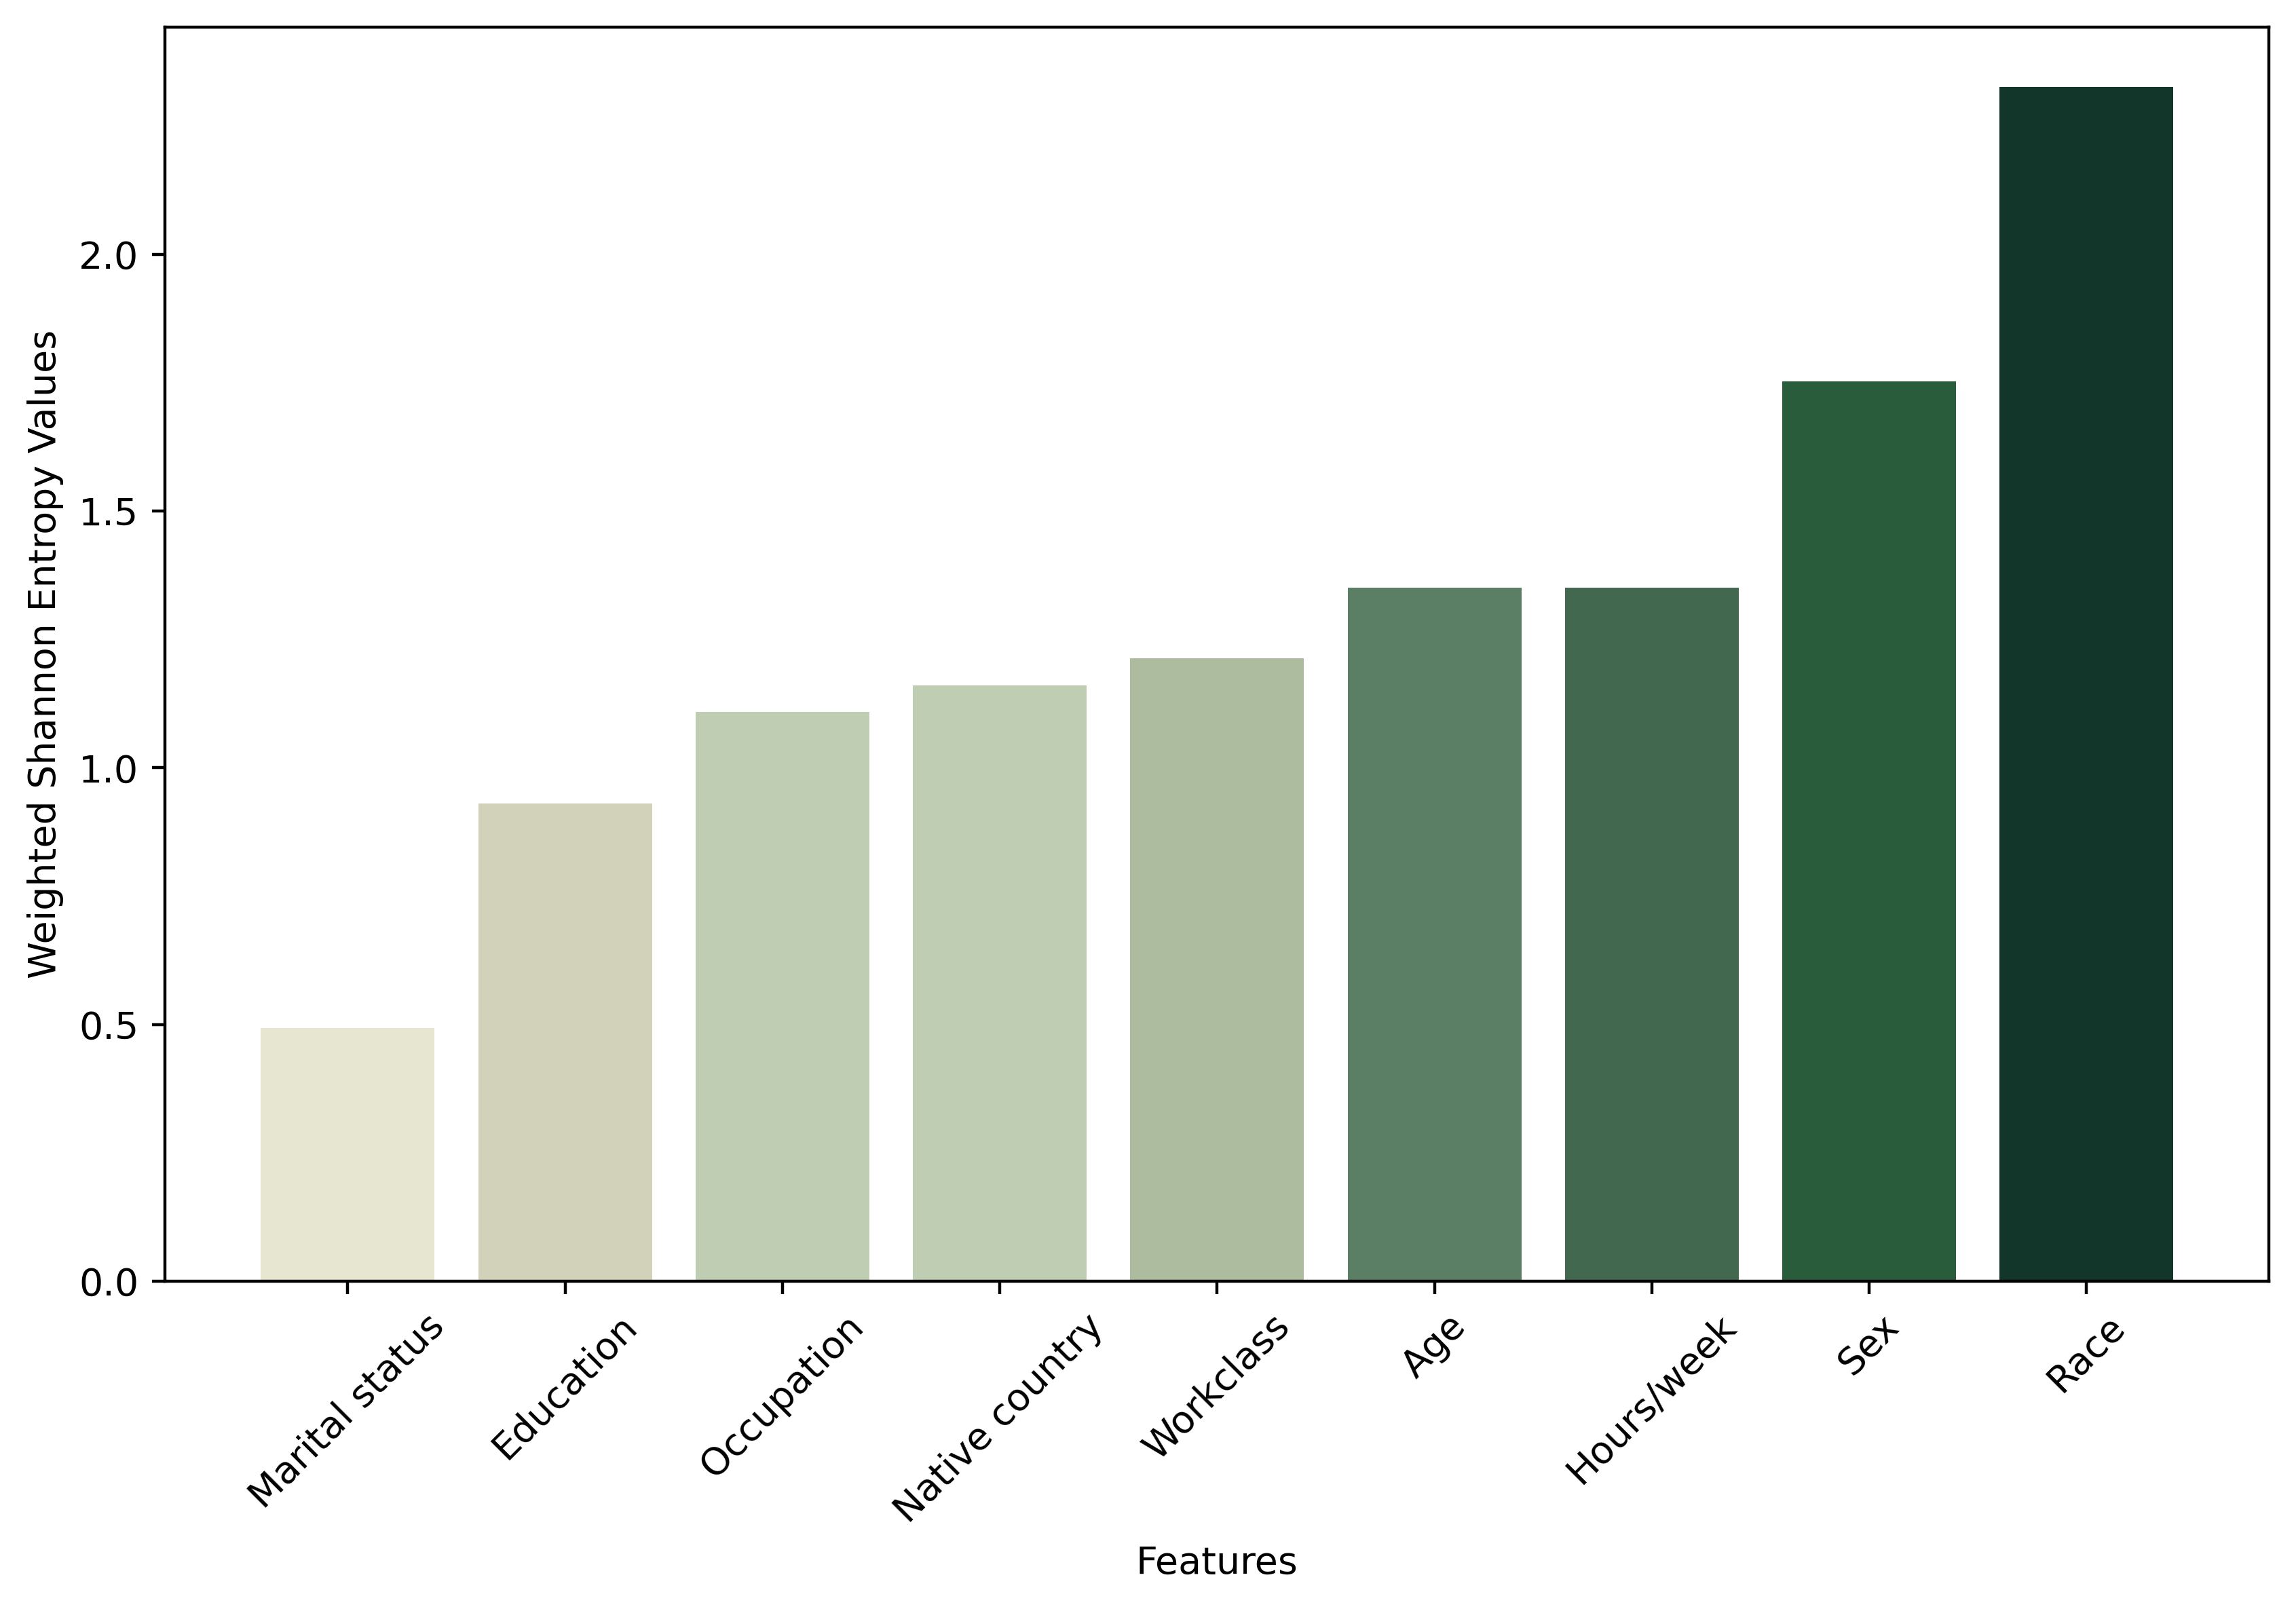

In [ ]:
# shapley adult
import matplotlib.pyplot as plt

reordered_colors = ['#e6e6d1', '#d2d2ba', '#bfcdb3', '#bfcdb3', '#adbc9f', '#5a7f65', '#436850', '#295c3b', '#12372a'] #'#fcfcf0'

features = ['Marital status', 'Education', 'Occupation', 'Age', 'Hours/week', 'Sex', 'Native country', 'Workclass', 'Race']
values = [0.493, 0.93, 1.108, 1.351, 1.351, 1.752, 1.16, 1.213, 2.326]
sorted_values, sorted_features = zip(*sorted(zip(values, features)))
sorted_values, sorted_features
plt.figure(figsize=(10, 6), dpi=400)
plt.bar(sorted_features, sorted_values, color=reordered_colors[:len(sorted_values)]) #color='mediumorchid'
plt.xlabel('Features')
plt.ylabel('Weighted Shannon Entropy Values')
plt.xticks(rotation=45)
plt.grid(False)

plt.savefig('shapley-adult_entopy.png', bbox_inches='tight')
plt.show()


### Seatpos data: Shapley feature importance WE-PRIME results

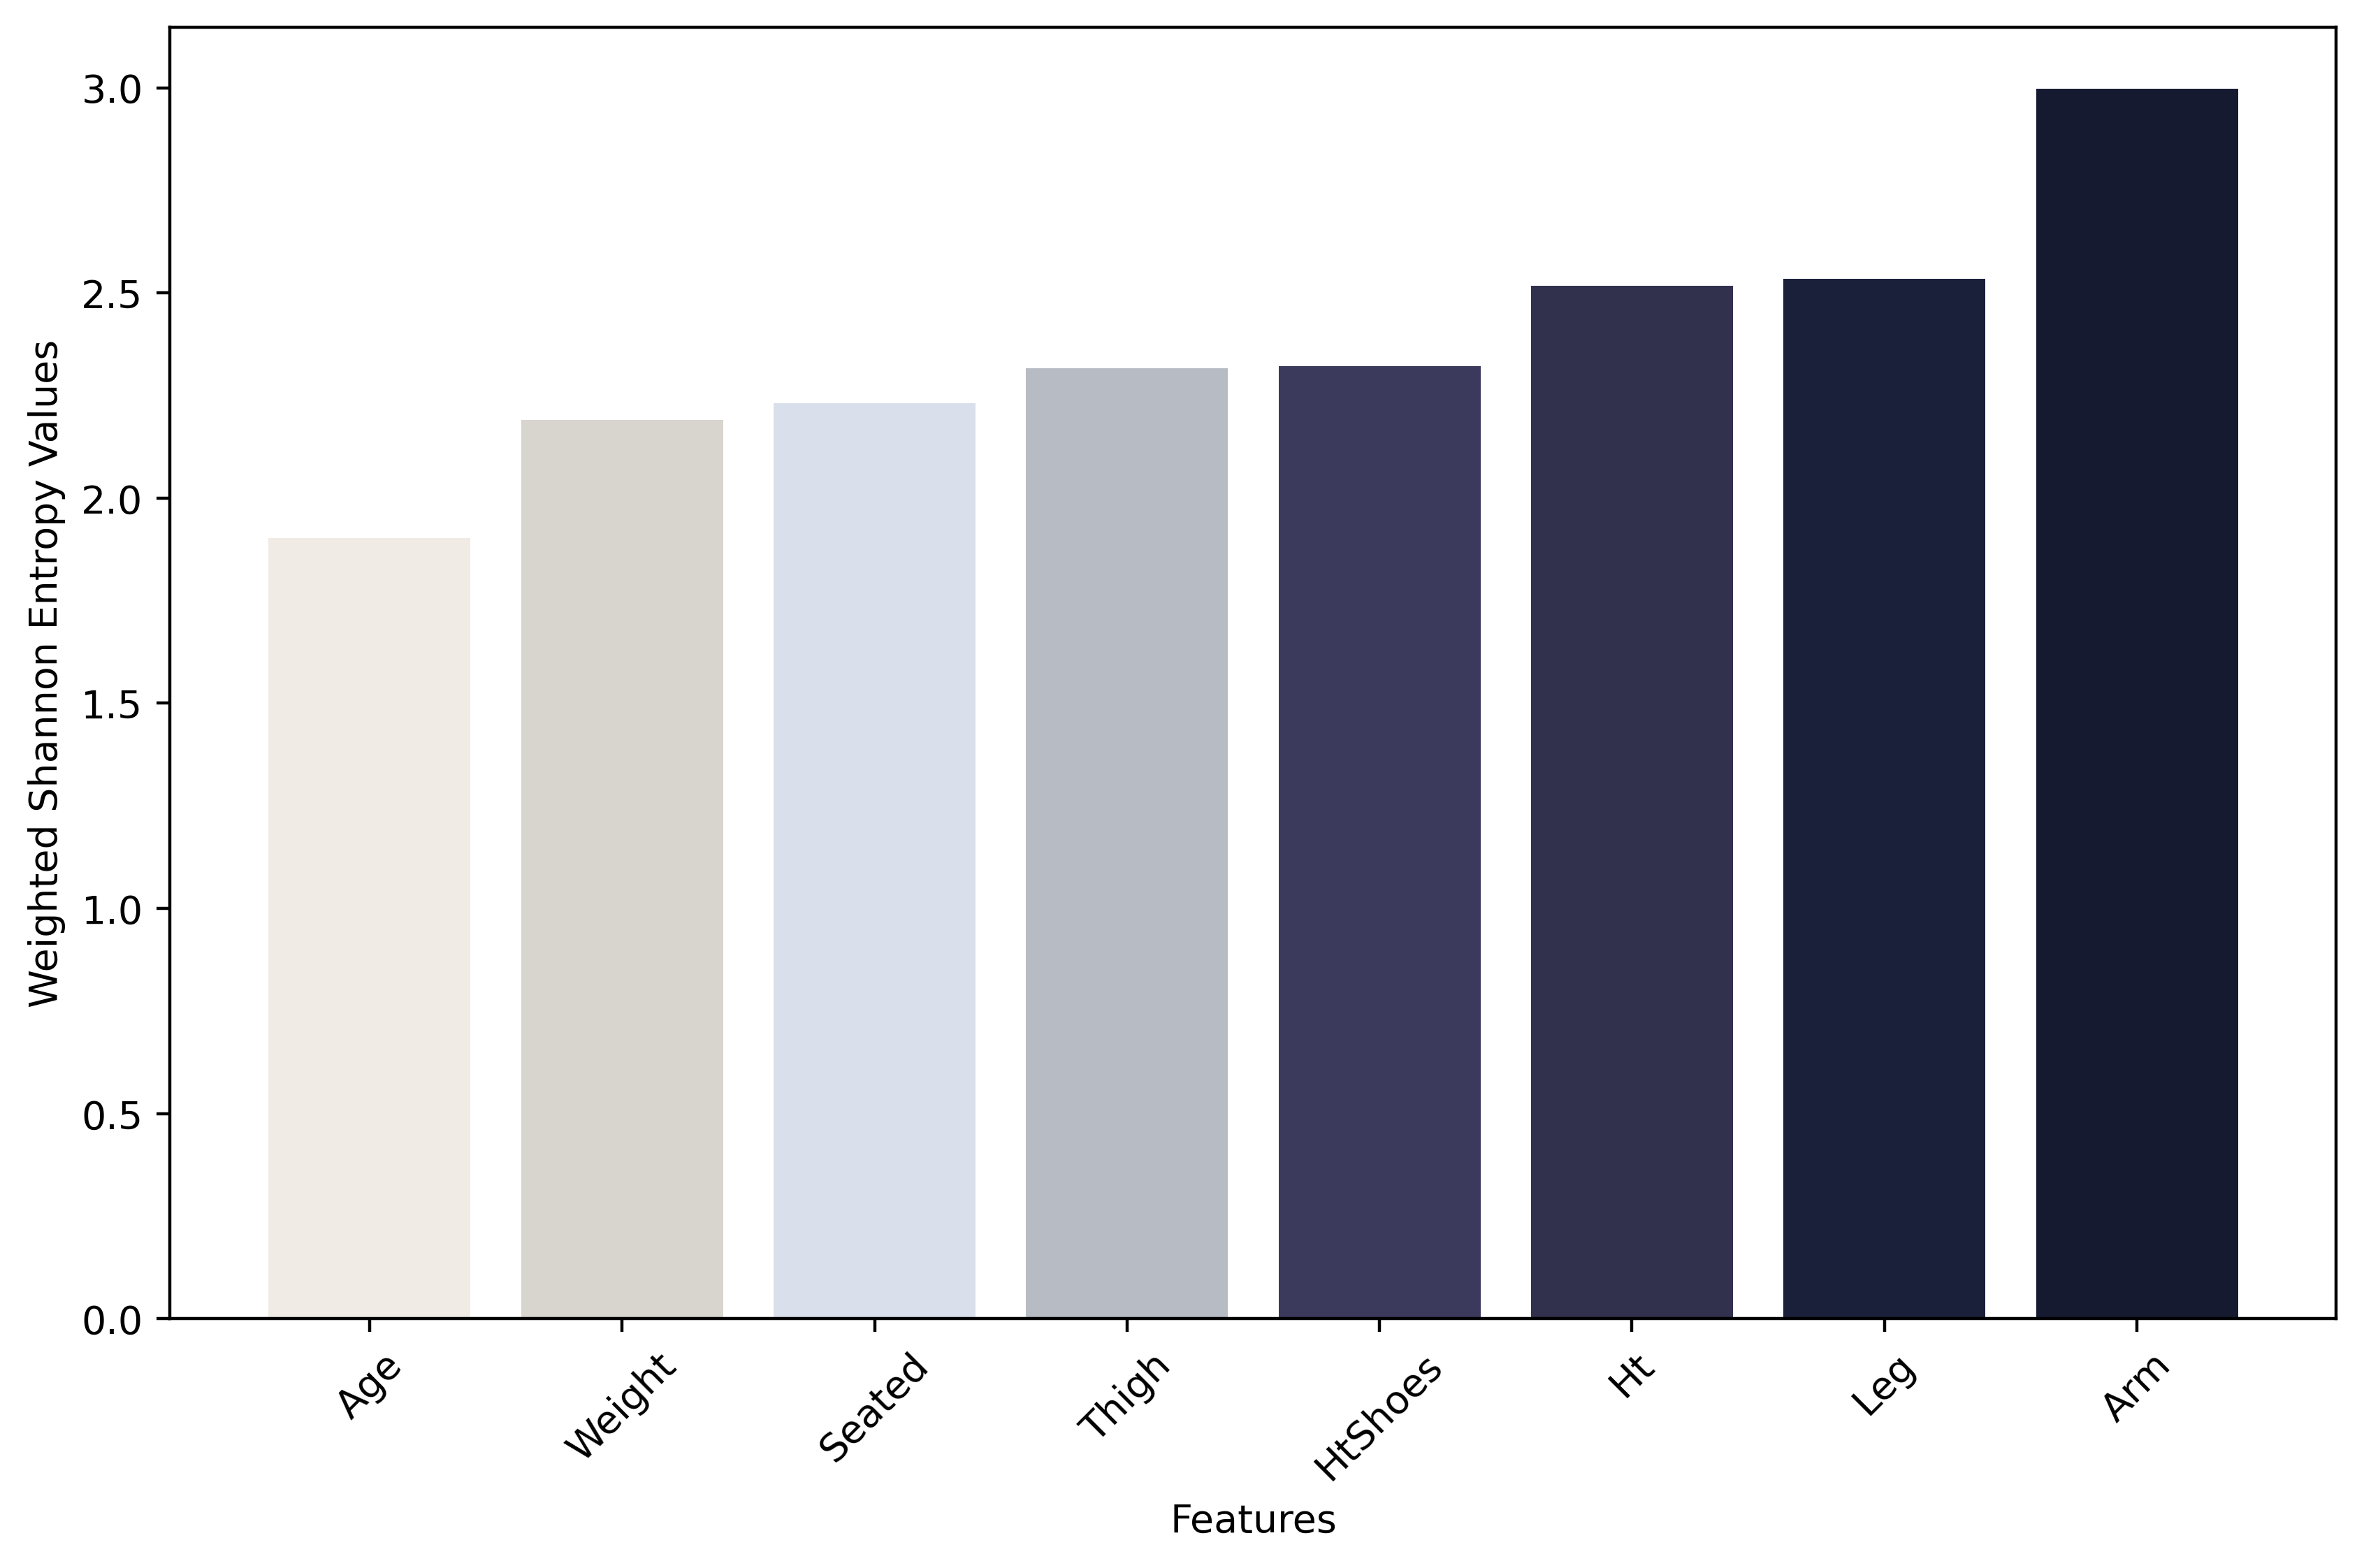

In [ ]:
# Shapley feature importance seatpos

import matplotlib.pyplot as plt
reordered_colors = ['#F0ECE5', '#D8D4CE', '#DAE0EB', '#B6BBC4', '#3B3A5C', '#31304D', '#1A1F3A', '#161A30']
features = ['Leg', 'Ht', 'HtShoes', 'Seated', 'Weight', 'Arm', 'Thigh', 'Age']
values = [2.534, 2.518, 2.321, 2.232, 2.191, 2.997, 2.317, 1.902]
sorted_values, sorted_features = zip(*sorted(zip(values, features)))
sorted_values, sorted_features


# Plotting
plt.figure(figsize=(10, 6), dpi=400)
plt.bar(sorted_features, sorted_values, color=reordered_colors[:len(sorted_values)]) #color='mediumorchid'
plt.xlabel('Features')
plt.ylabel('Weighted Shannon Entropy Values')
plt.xticks(rotation=45)
plt.grid(False)

plt.savefig('shapley-seatpos_entopy.png', bbox_inches='tight')
plt.show()


### Adult Shapley feautre importance plot

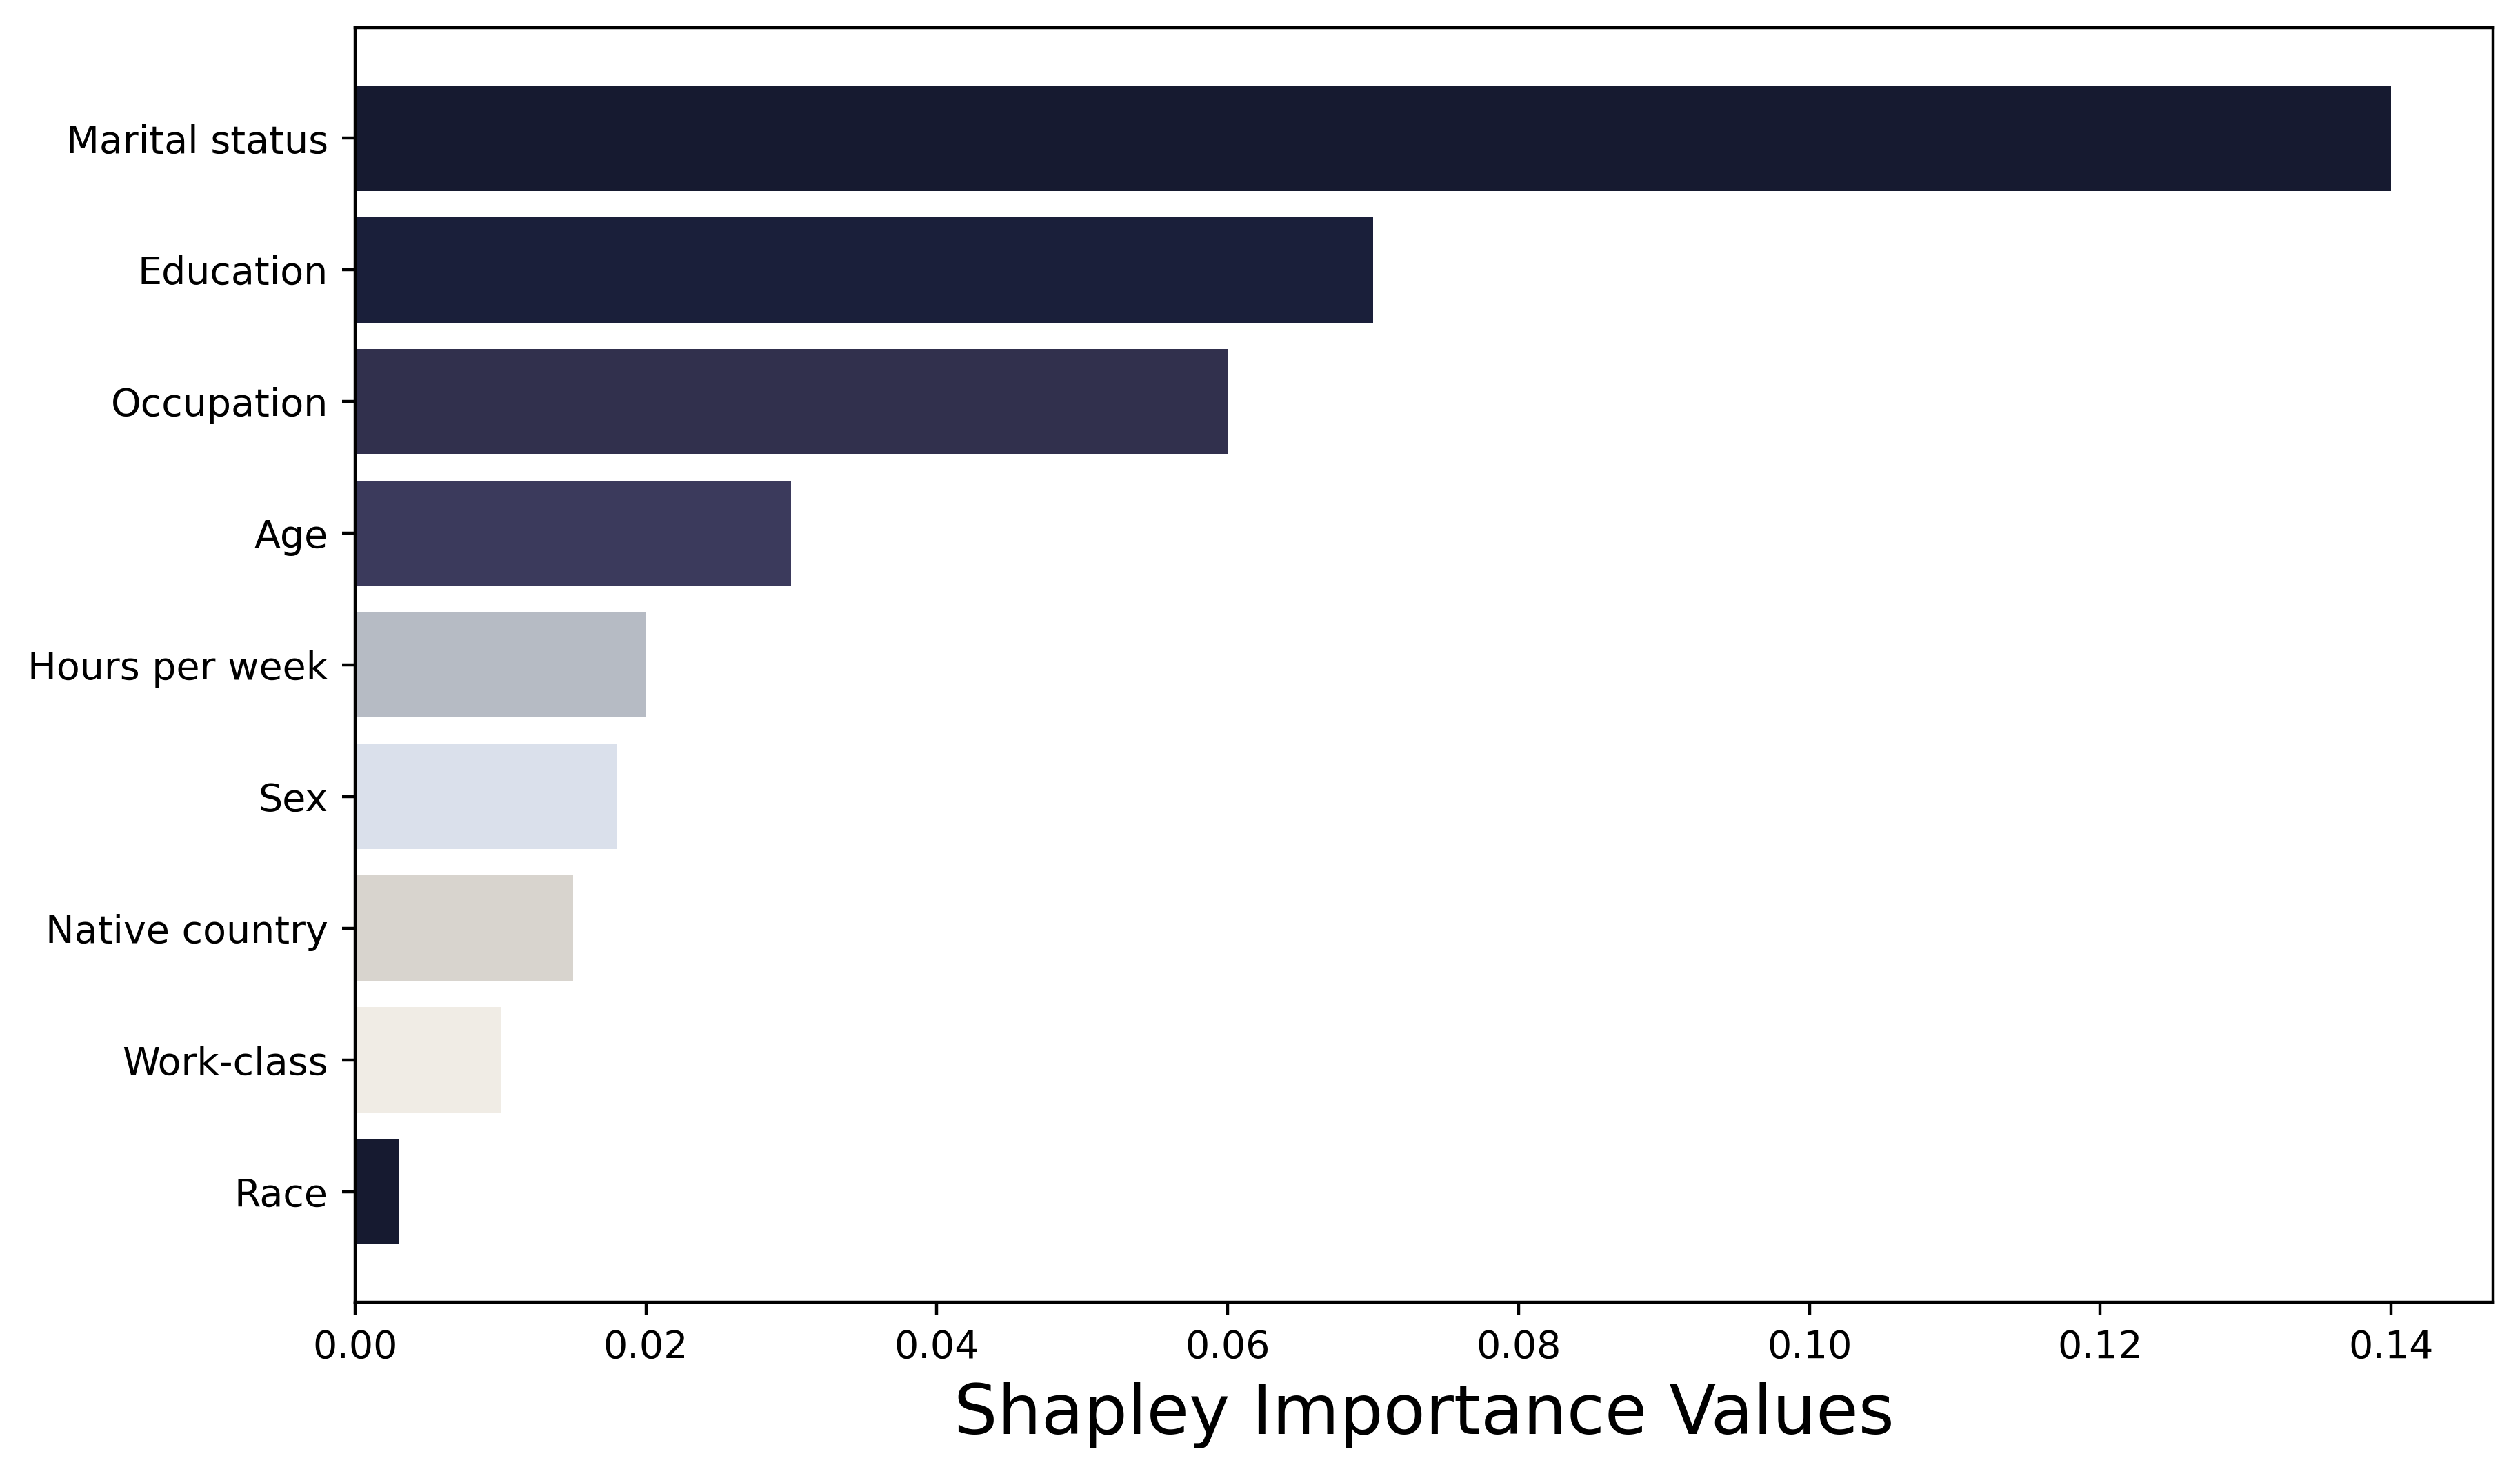

In [ ]:
#adult_shapley_org.png

import matplotlib.pyplot as plt

features = ["Marital status", "Education", "Occupation", "Age", "Hours per week", "Sex", "Native country", "Work-class", "Race"]
rankings = [1, 2, 3, 4, 5, 6, 7, 8, 9]
shapley_values = [0.14, 0.07, 0.06, 0.03, 0.02, 0.018, 0.015, 0.01, 0.003]

colors = ['#161A30', '#1A1F3A', '#31304D', '#3B3A5C', '#B6BBC4', '#DAE0EB', '#D8D4CE', '#F0ECE5']

plt.figure(figsize=(10, 6), dpi=400)
bars = plt.barh(features, shapley_values, color=colors)
plt.xlabel('Shapley Importance Values', fontsize = 18)
plt.gca().invert_yaxis()

plt.savefig('adult_shapley_org.png', bbox_inches='tight')
plt.show()


### Seatpos data feautre importance plot

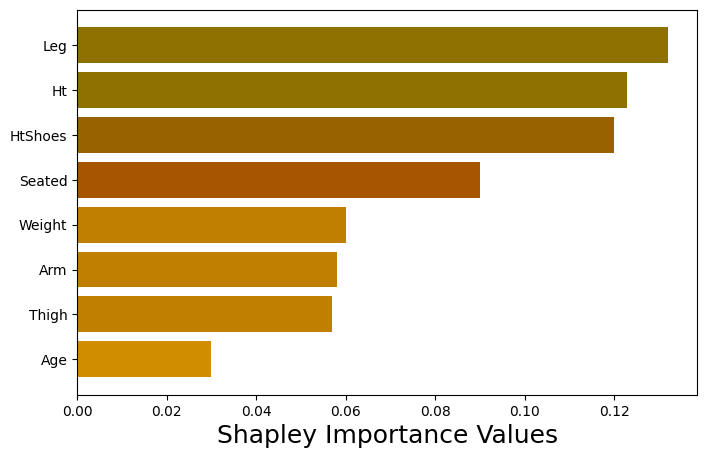

In [ ]:
import matplotlib.pyplot as plt

features = ["Leg", "Ht", "HtShoes", "Seated", "Weight", "Arm", "Thigh", "Age"]
rankings = [1, 2, 3, 4, 5, 6, 7, 8]
importance_values = [0.132, 0.123, 0.12, 0.09, 0.06, 0.058, 0.057, 0.03]
colors = ["#8E7100", "#8E7100", "#996200", "#A75500", "#C07F00", "#C07F00", "#C07F00", "#D18D00",]

plt.figure(figsize=(8, 5))
bars = plt.barh(features, importance_values, color=colors)
plt.xlabel('Shapley Importance Values', fontsize = 18)
plt.gca().invert_yaxis()

plt.savefig('seatpos_shapley_org.png', bbox_inches='tight')
plt.show()


In [ ]:
# adult ccra


import math

maritStatus = [(1, 8), (1, 1)]
occup = [(1, 3), (1, 5), (1, 1)]
education = [(1, 1), (0.9, 1), (1, 6), (1, 1)]
age = [(1, 1), (1, 3), (1, 5)]
hoursWeek = [(1, 3), (1, 1), (1, 5)]
sex = [(1, 4), (1, 1), (1, 3), (1,1)]
workclass = [(1, 6), (1, 2), (1, 1)]
native_country = [(1,8), (1,1)]
race = [(1, 5), (1, 3), (0.85, 1)]


# Calculate weighted probabilities
weighted_probabilities = [p * freq for p, freq in race]
# Normalize weighted probabilities
total_weighted = sum(weighted_probabilities)
normalized_weighted_probabilities = [wp / total_weighted for wp in weighted_probabilities]
# Calculating Shannon Entropy for each weighted probability
weighted_entropies = [-p * math.log2(p) for p in normalized_weighted_probabilities if p > 0]
# Summing up the weighted entropies
total_weighted_entropy = sum(weighted_entropies)
(normalized_weighted_probabilities, weighted_entropies, total_weighted_entropy)
print(total_weighted_entropy)


1.319097510448877


In [ ]:
# adult cctv

import math

maritStatus = [(1, 8), (1, 0.85)]
occup = [(1, 3), (1, 5), (0.85, 1)]
education = [(1, 1), (1, 1), (1, 6), (1, 1)]
age = [(1, 1), (1, 3), (1, 5)]
hoursWeek = [(1, 3), (1, 1), (1, 5)]
sex = [(1, 4), (1, 1), (1, 3), (1,1)]
workclass = [(1, 7), (1, 1), (1, 1)]
native_country = [(1,9)]
race = [(1, 3), (0.8, 1), (0.85, 1), (1, 2), (0.9, 1), (0.95, 1)]


# Calculate weighted probabilities
weighted_probabilities = [p * freq for p, freq in race]
# Normalize weighted probabilities
total_weighted = sum(weighted_probabilities)
normalized_weighted_probabilities = [wp / total_weighted for wp in weighted_probabilities]
# Calculating Shannon Entropy for each weighted probability
weighted_entropies = [-p * math.log2(p) for p in normalized_weighted_probabilities if p > 0]
# Summing up the weighted entropies
total_weighted_entropy = sum(weighted_entropies)
(normalized_weighted_probabilities, weighted_entropies, total_weighted_entropy)
print(total_weighted_entropy)






2.370880932522107


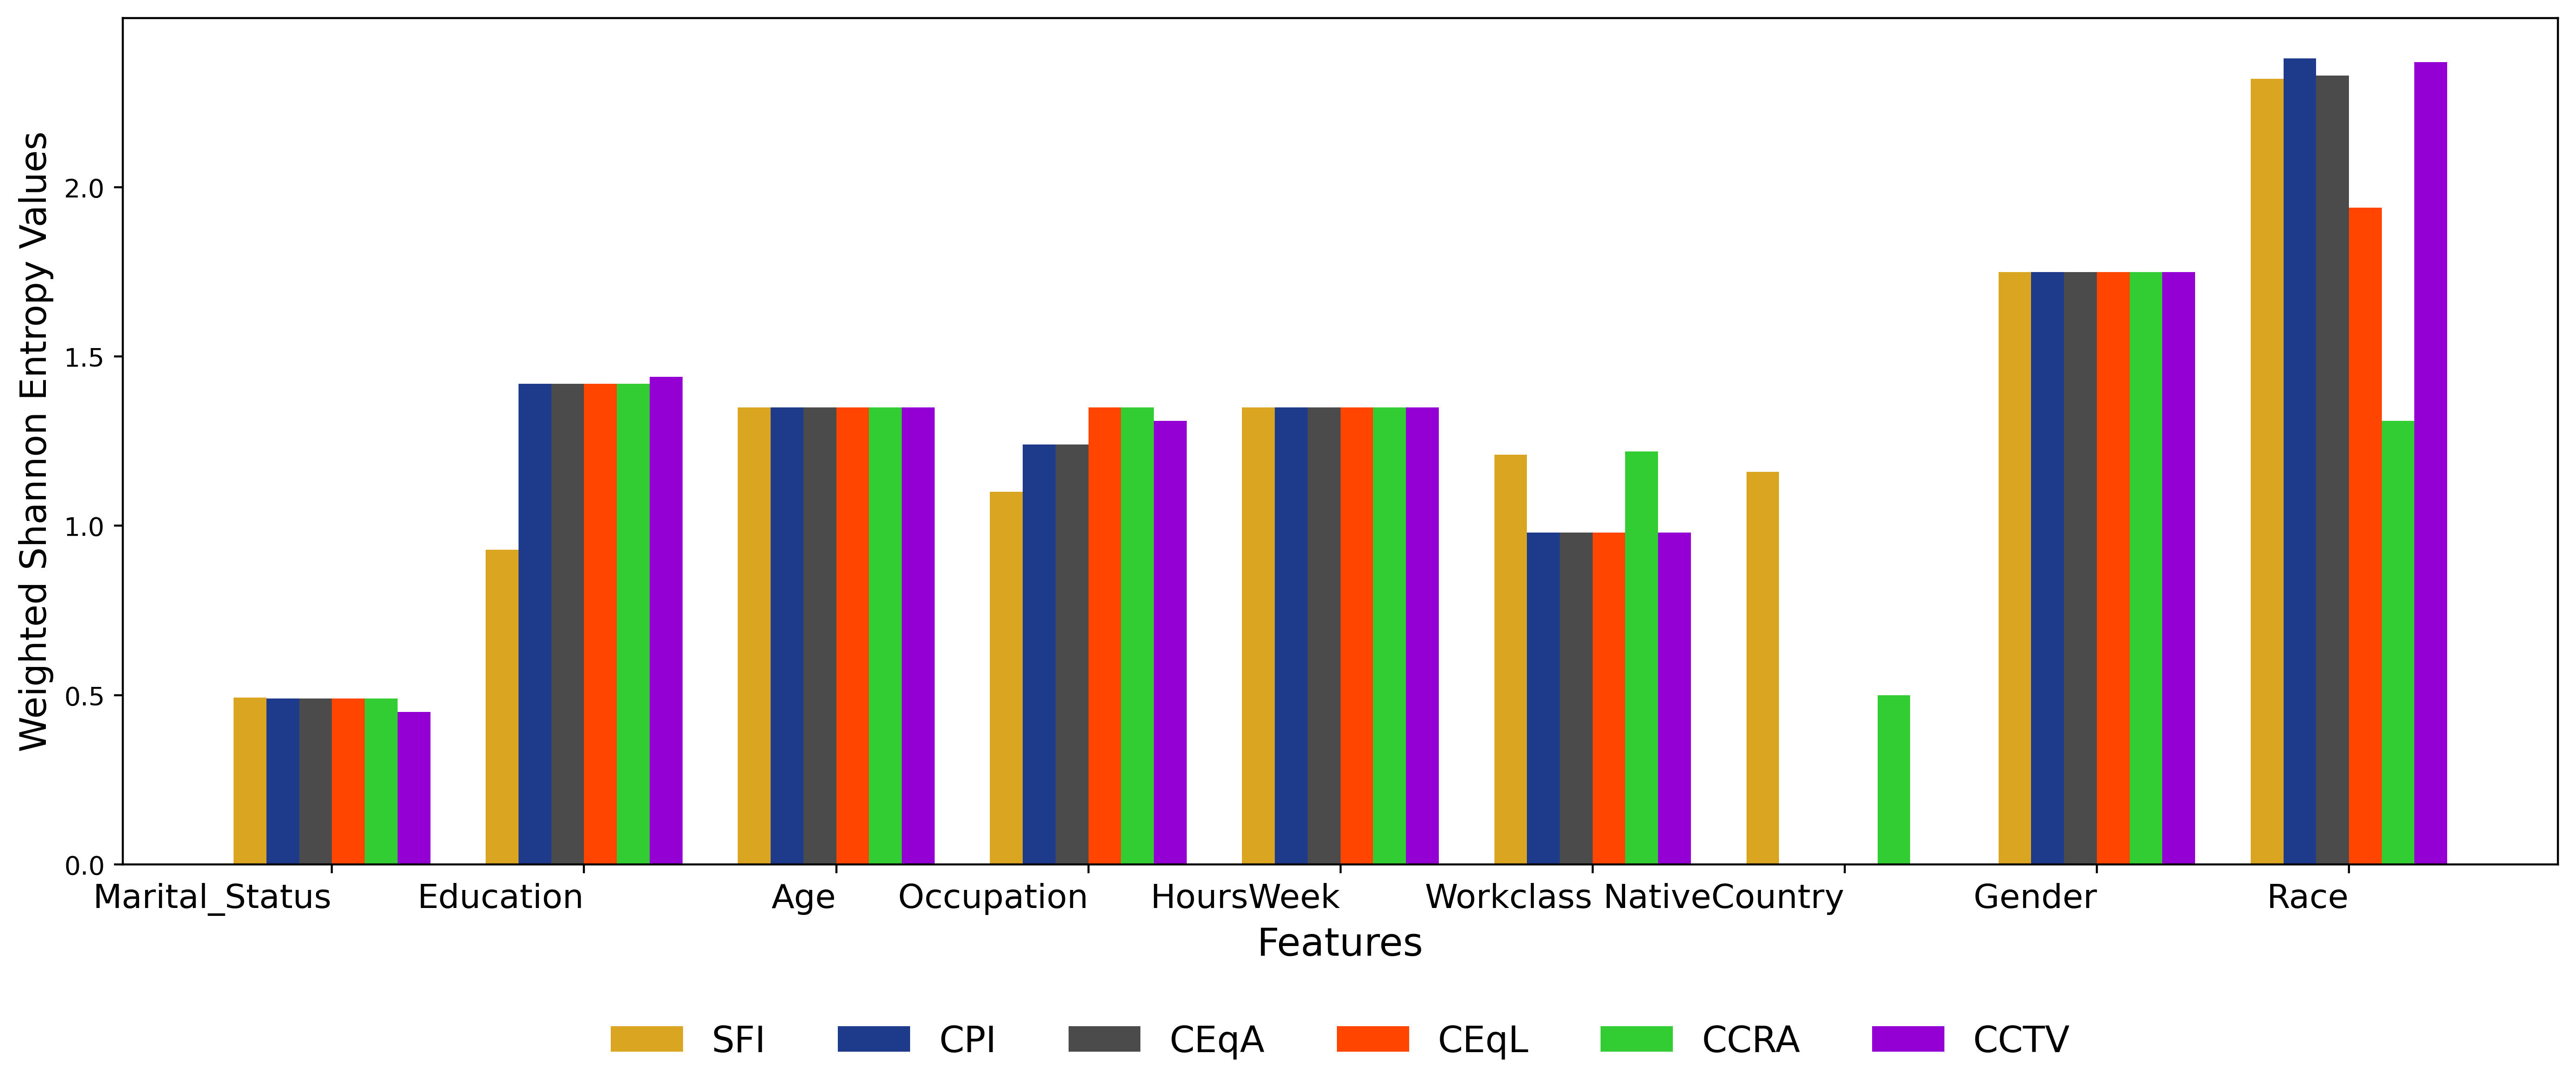

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Features': ['Marital_Status', 'Education', 'Age', 'Occupation', 'HoursWeek', 'Workclass', 'NativeCountry', 'Gender', 'Race'],
    'SFI': [0.493, 0.93, 1.35, 1.1, 1.35, 1.21, 1.16, 1.75, 2.32],
    'CPI': [0.49, 1.42, 1.35, 1.24, 1.35, 0.98, 0, 1.75, 2.38],
    'CEqA': [0.49, 1.42, 1.35, 1.24, 1.35, 0.98, 0, 1.75, 2.33],
    'CEqL': [0.49, 1.42, 1.35, 1.35, 1.35, 0.98, 0, 1.75, 1.94],
    'CCRA': [0.49, 1.42, 1.35, 1.35, 1.35, 1.22, 0.5, 1.75, 1.31],
    'CCTV': [0.45, 1.44, 1.35, 1.31, 1.35, 0.98, 0, 1.75, 2.37]
}

df = pd.DataFrame(data)
num_methods = len(df.columns) - 1
ind = np.arange(len(df['Features']))
width = 0.13
fig, ax = plt.subplots(figsize=(14, 6), dpi=400)
colors = ['#DAA520', '#1E3A8A', '#4B4B4B', '#FF4500', '#32CD32', '#9400D3']
for i, method in enumerate(df.columns[1:]):
    ax.bar(ind + i * width, df[method], width, label=method, color=colors[i])
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Weighted Shannon Entropy Values', fontsize=14)
ax.set_xticks(ind + width * (num_methods - 1) / 2)
ax.set_xticklabels(df['Features'], ha='right', fontsize=13)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=14, ncol=num_methods, frameon=False)
plt.tight_layout()
plt.savefig('WSE_adult_features.png', dpi=450, bbox_inches='tight')
plt.show()


In [ ]:
# adult cctv
import math

leg = [(0.766, 1), (1, 4), (1, 2), (0.966, 1)]
ht = [(0.766, 1), (1, 4), (1, 1), (1, 1), (0.966,1)]
htshoes = [(0.766,1), (1,5), (1,1), (0.966,1)]
seated = [(0.8,1), (1,1), (1,1), (1,1)]
weight = [(0.566,1), (1,2),(1,4), (1,1)]
arm = [(0.633,1), (1,1), (0.933,1), (1,2), (0.833,1), (1,1), (0.966,1)]
thigh = [(0.866,1), (1, 3), (0.933, 1), (0.833,1), (0.833,1), (0.966,1)]
age = [(1, 1), (1, 6), (0.833, 1)]


# Calculate weighted probabilities
weighted_probabilities = [p * freq for p, freq in age]
# Normalize weighted probabilities
total_weighted = sum(weighted_probabilities)
normalized_weighted_probabilities = [wp / total_weighted for wp in weighted_probabilities]
# Calculating Shannon Entropy for each weighted probability
weighted_entropies = [-p * math.log2(p) for p in normalized_weighted_probabilities if p > 0]
# Summing up the weighted entropies
total_weighted_entropy = sum(weighted_entropies)
(normalized_weighted_probabilities, weighted_entropies, total_weighted_entropy)
print(total_weighted_entropy)






1.0175431861118676


In [ ]:
# adult cctv
import math

leg = [(0.766, 1), (1, 4), (1, 2), (0.966, 1)]
ht = [(0.766, 1), (1, 4), (1, 1), (1, 1), (0.966,1)]
htshoes = [(0.766,1), (1,5), (1,1), (0.966,1)]
seated = [(0.8,1), (1,1), (1,1), (1,1)]
weight = [(0.566,1), (1,2),(1,4), (1,1)]
arm = [(0.633,1), (1,1), (0.933,1), (1,2), (0.833,1), (1,1), (0.966,1)]
thigh = [(0.866,1), (1, 3), (0.933, 1), (0.833,1), (0.833,1), (0.966,1)]
age = [(1, 1), (1, 6), (0.833, 1)]


# Calculate weighted probabilities
weighted_probabilities = [p * freq for p, freq in age]
# Normalize weighted probabilities
total_weighted = sum(weighted_probabilities)
normalized_weighted_probabilities = [wp / total_weighted for wp in weighted_probabilities]
# Calculating Shannon Entropy for each weighted probability
weighted_entropies = [-p * math.log2(p) for p in normalized_weighted_probabilities if p > 0]
# Summing up the weighted entropies
total_weighted_entropy = sum(weighted_entropies)
(normalized_weighted_probabilities, weighted_entropies, total_weighted_entropy)
print(total_weighted_entropy)

In [ ]:
## CPI

import math

leg = [(0.6, 1), (0.566, 1), (0.55, 1), (0.65, 1), (0.95,1), (0.85,1), (0.7, 1)]
ht = [(0.6, 1), (0.566, 1), (1,1), (0.65,1), (0.65,1),(0.95,1), (0.85,1), (0.7,1)]
htshoes = [(0.6,1), (0.566,1), (1,1), (0.6,1), (0.95,2), (0.85,1), (0.7,1)]
seated = [(1,2), (0.633, 1), (1,2), (0.95,1), (0.65, 1), (0.95,1)]
weight = [(1,2), (0.633,1), (1,3), (0.95,1), (0.6,1)]
arm = [(0.933, 1), (0.633, 1), (0.75, 2), (1, 1), (0.7, 1), (0.95, 1)]
thigh = [(0.933, 1), (0.633, 1), (0.75, 1), (1, 2), (0.75, 1), (1, 1), (0.95, 1)]
age = [(1,1), (0.633, 1), (0.55, 1), (0.6, 1), (0.65, 2)]


# Calculate weighted probabilities
weighted_probabilities = [p * freq for p, freq in age]
# Normalize weighted probabilities
total_weighted = sum(weighted_probabilities)
normalized_weighted_probabilities = [wp / total_weighted for wp in weighted_probabilities]
# Calculating Shannon Entropy for each weighted probability
weighted_entropies = [-p * math.log2(p) for p in normalized_weighted_probabilities if p > 0]
# Summing up the weighted entropies
total_weighted_entropy = sum(weighted_entropies)
(normalized_weighted_probabilities, weighted_entropies, total_weighted_entropy)
print(total_weighted_entropy)

2.2358729452241883


## Seatpos entropies

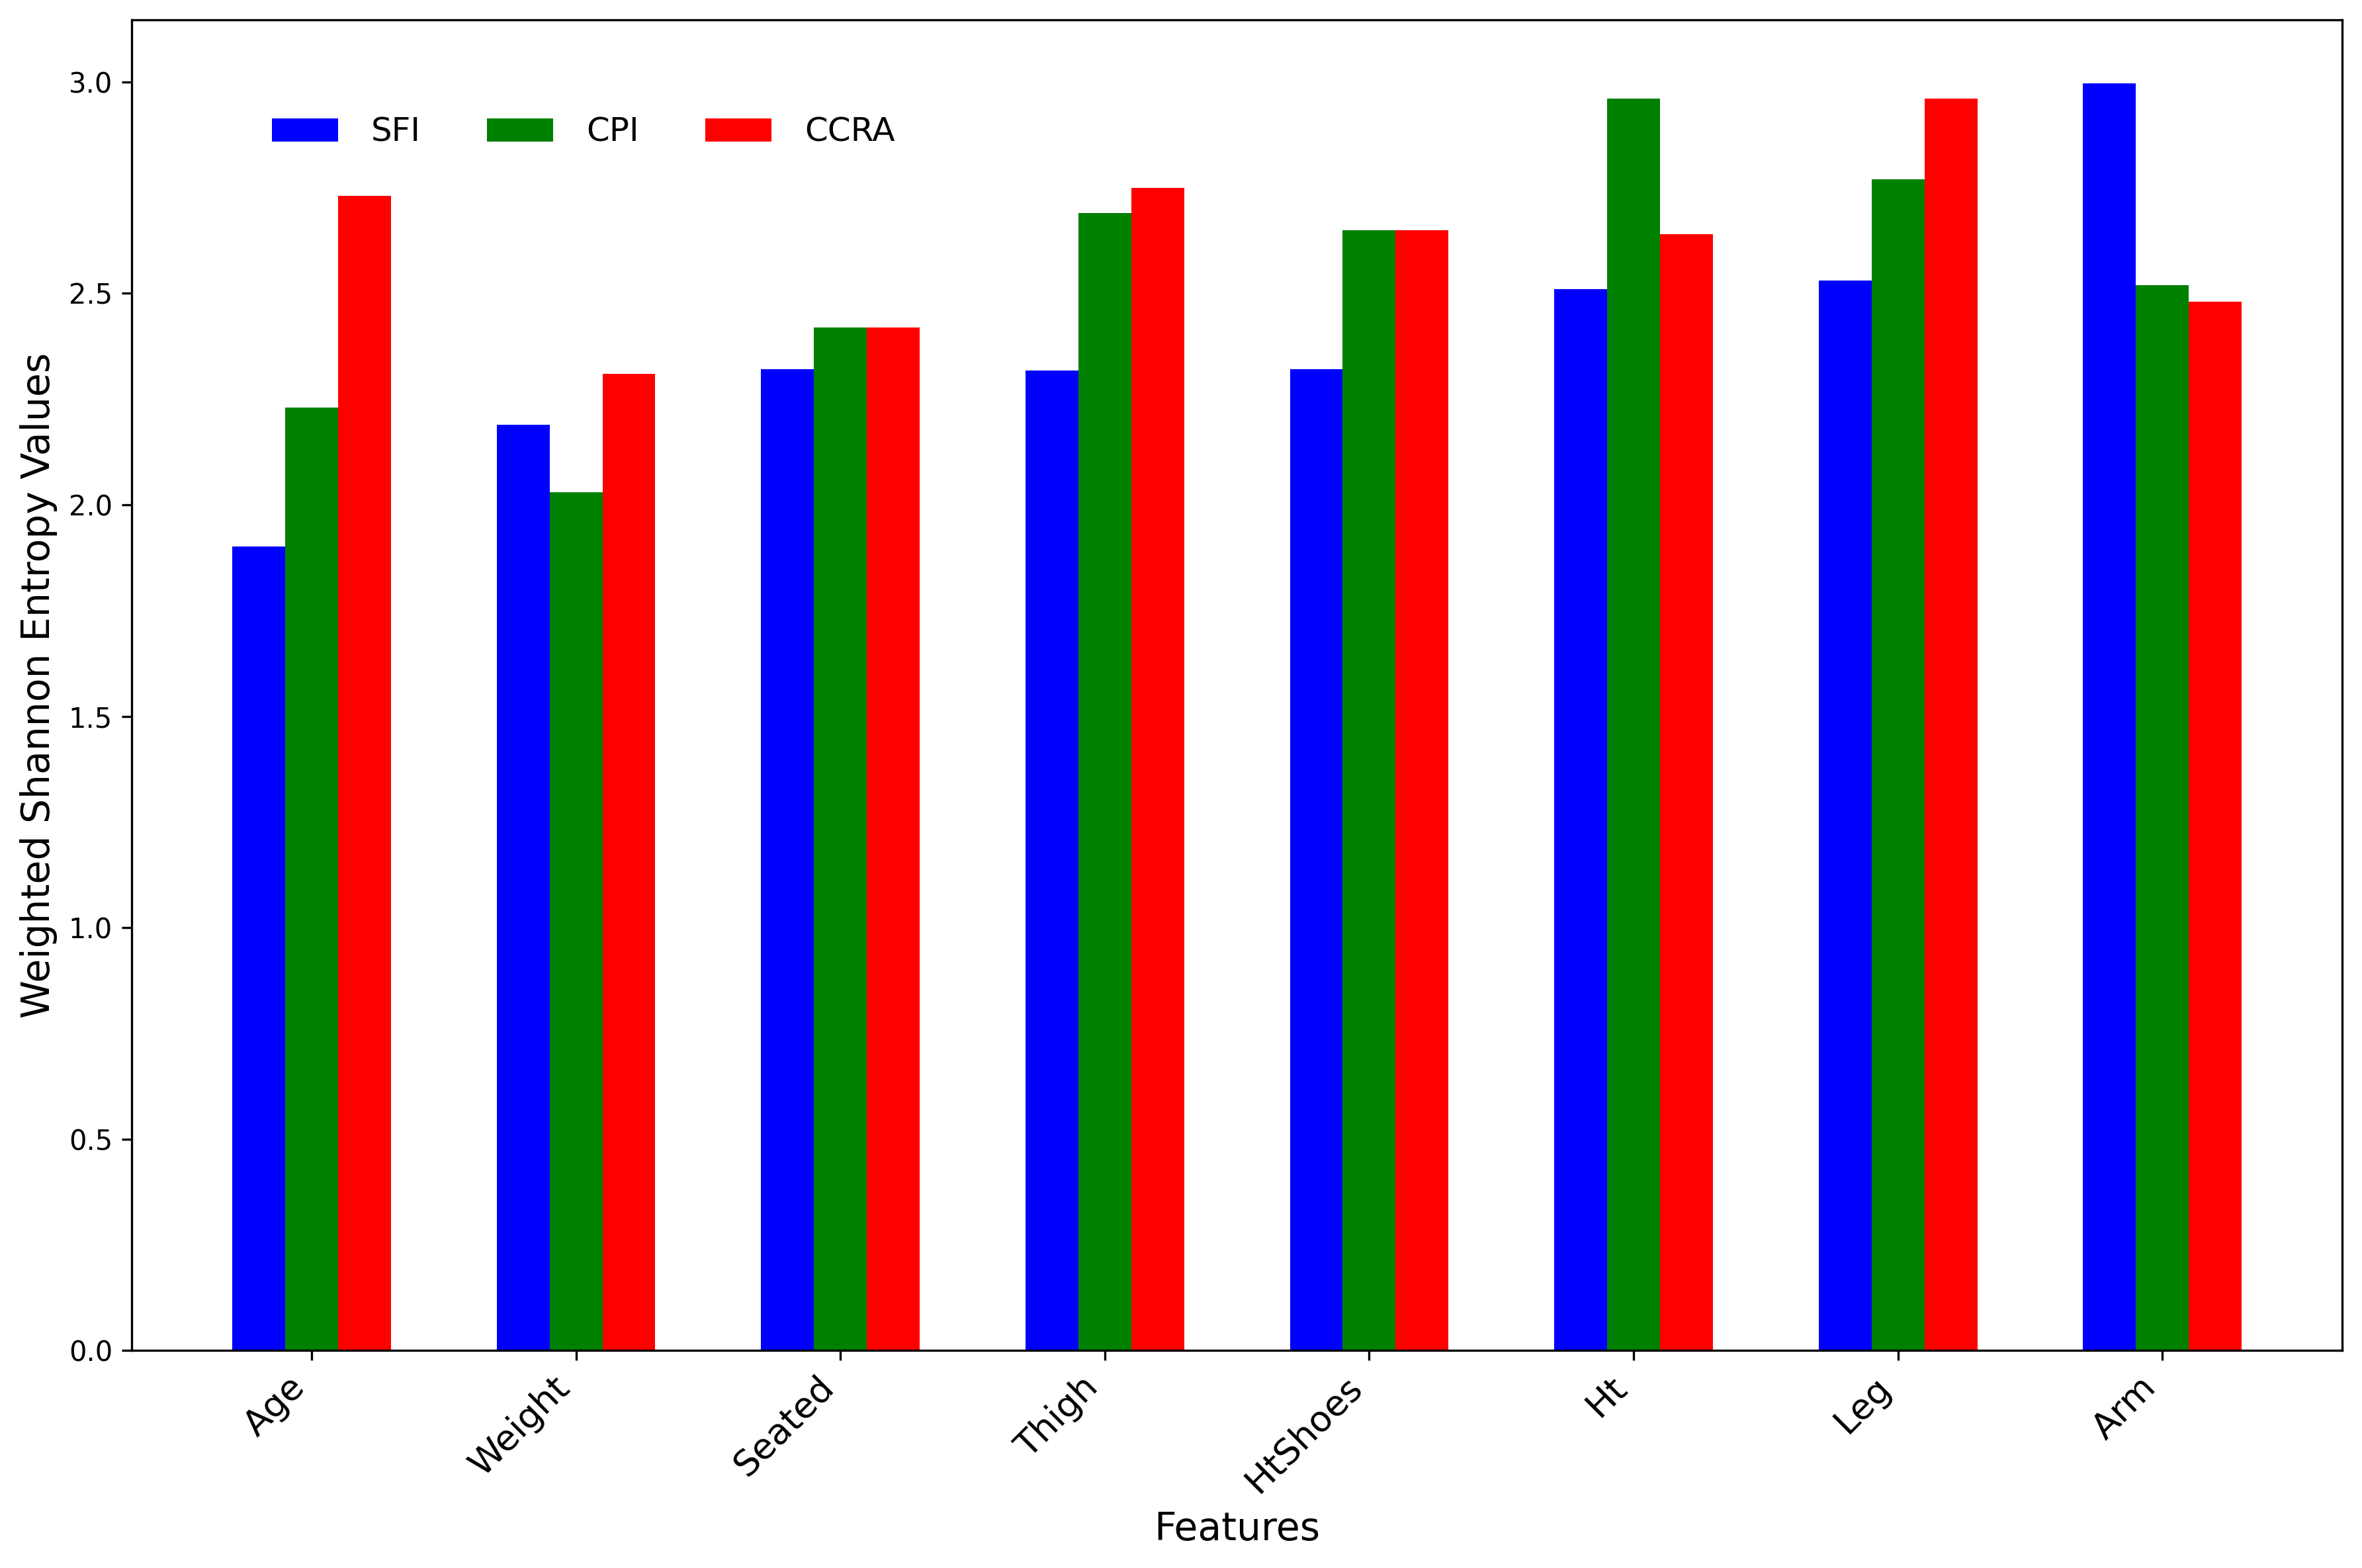

In [ ]:
# Seatpos entropies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Features': ['Age', 'Weight', 'Seated', 'Thigh', 'HtShoes', 'Ht', 'Leg', 'Arm'],
    'SFI': [1.902, 2.19, 2.32, 2.317, 2.32, 2.51, 2.53, 2.997],
    'CPI': [2.23, 2.03, 2.42, 2.69, 2.65, 2.96, 2.77, 2.52],
    'CCRA': [2.73, 2.31, 2.42, 2.75, 2.65, 2.64, 2.96, 2.48]
}

df = pd.DataFrame(data)
num_methods = len(df.columns) - 1
ind = np.arange(len(df['Features']))
width = 0.2
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
colors = ['blue', 'green', 'red']
for i, method in enumerate(df.columns[1:]):
    ax.bar(ind + i * width, df[method], width, label=method, color=colors[i])

ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Weighted Shannon Entropy Values', fontsize=14)
ax.set_xticks(ind + width * (num_methods - 1) / 2)
ax.set_xticklabels(df['Features'], rotation=45, ha='right', fontsize=13)
ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=14, ncol=num_methods, frameon=False, handletextpad=1)
plt.tight_layout()
plt.savefig('WSE_seatpos_features.png', dpi=450, bbox_inches='tight')

plt.show()


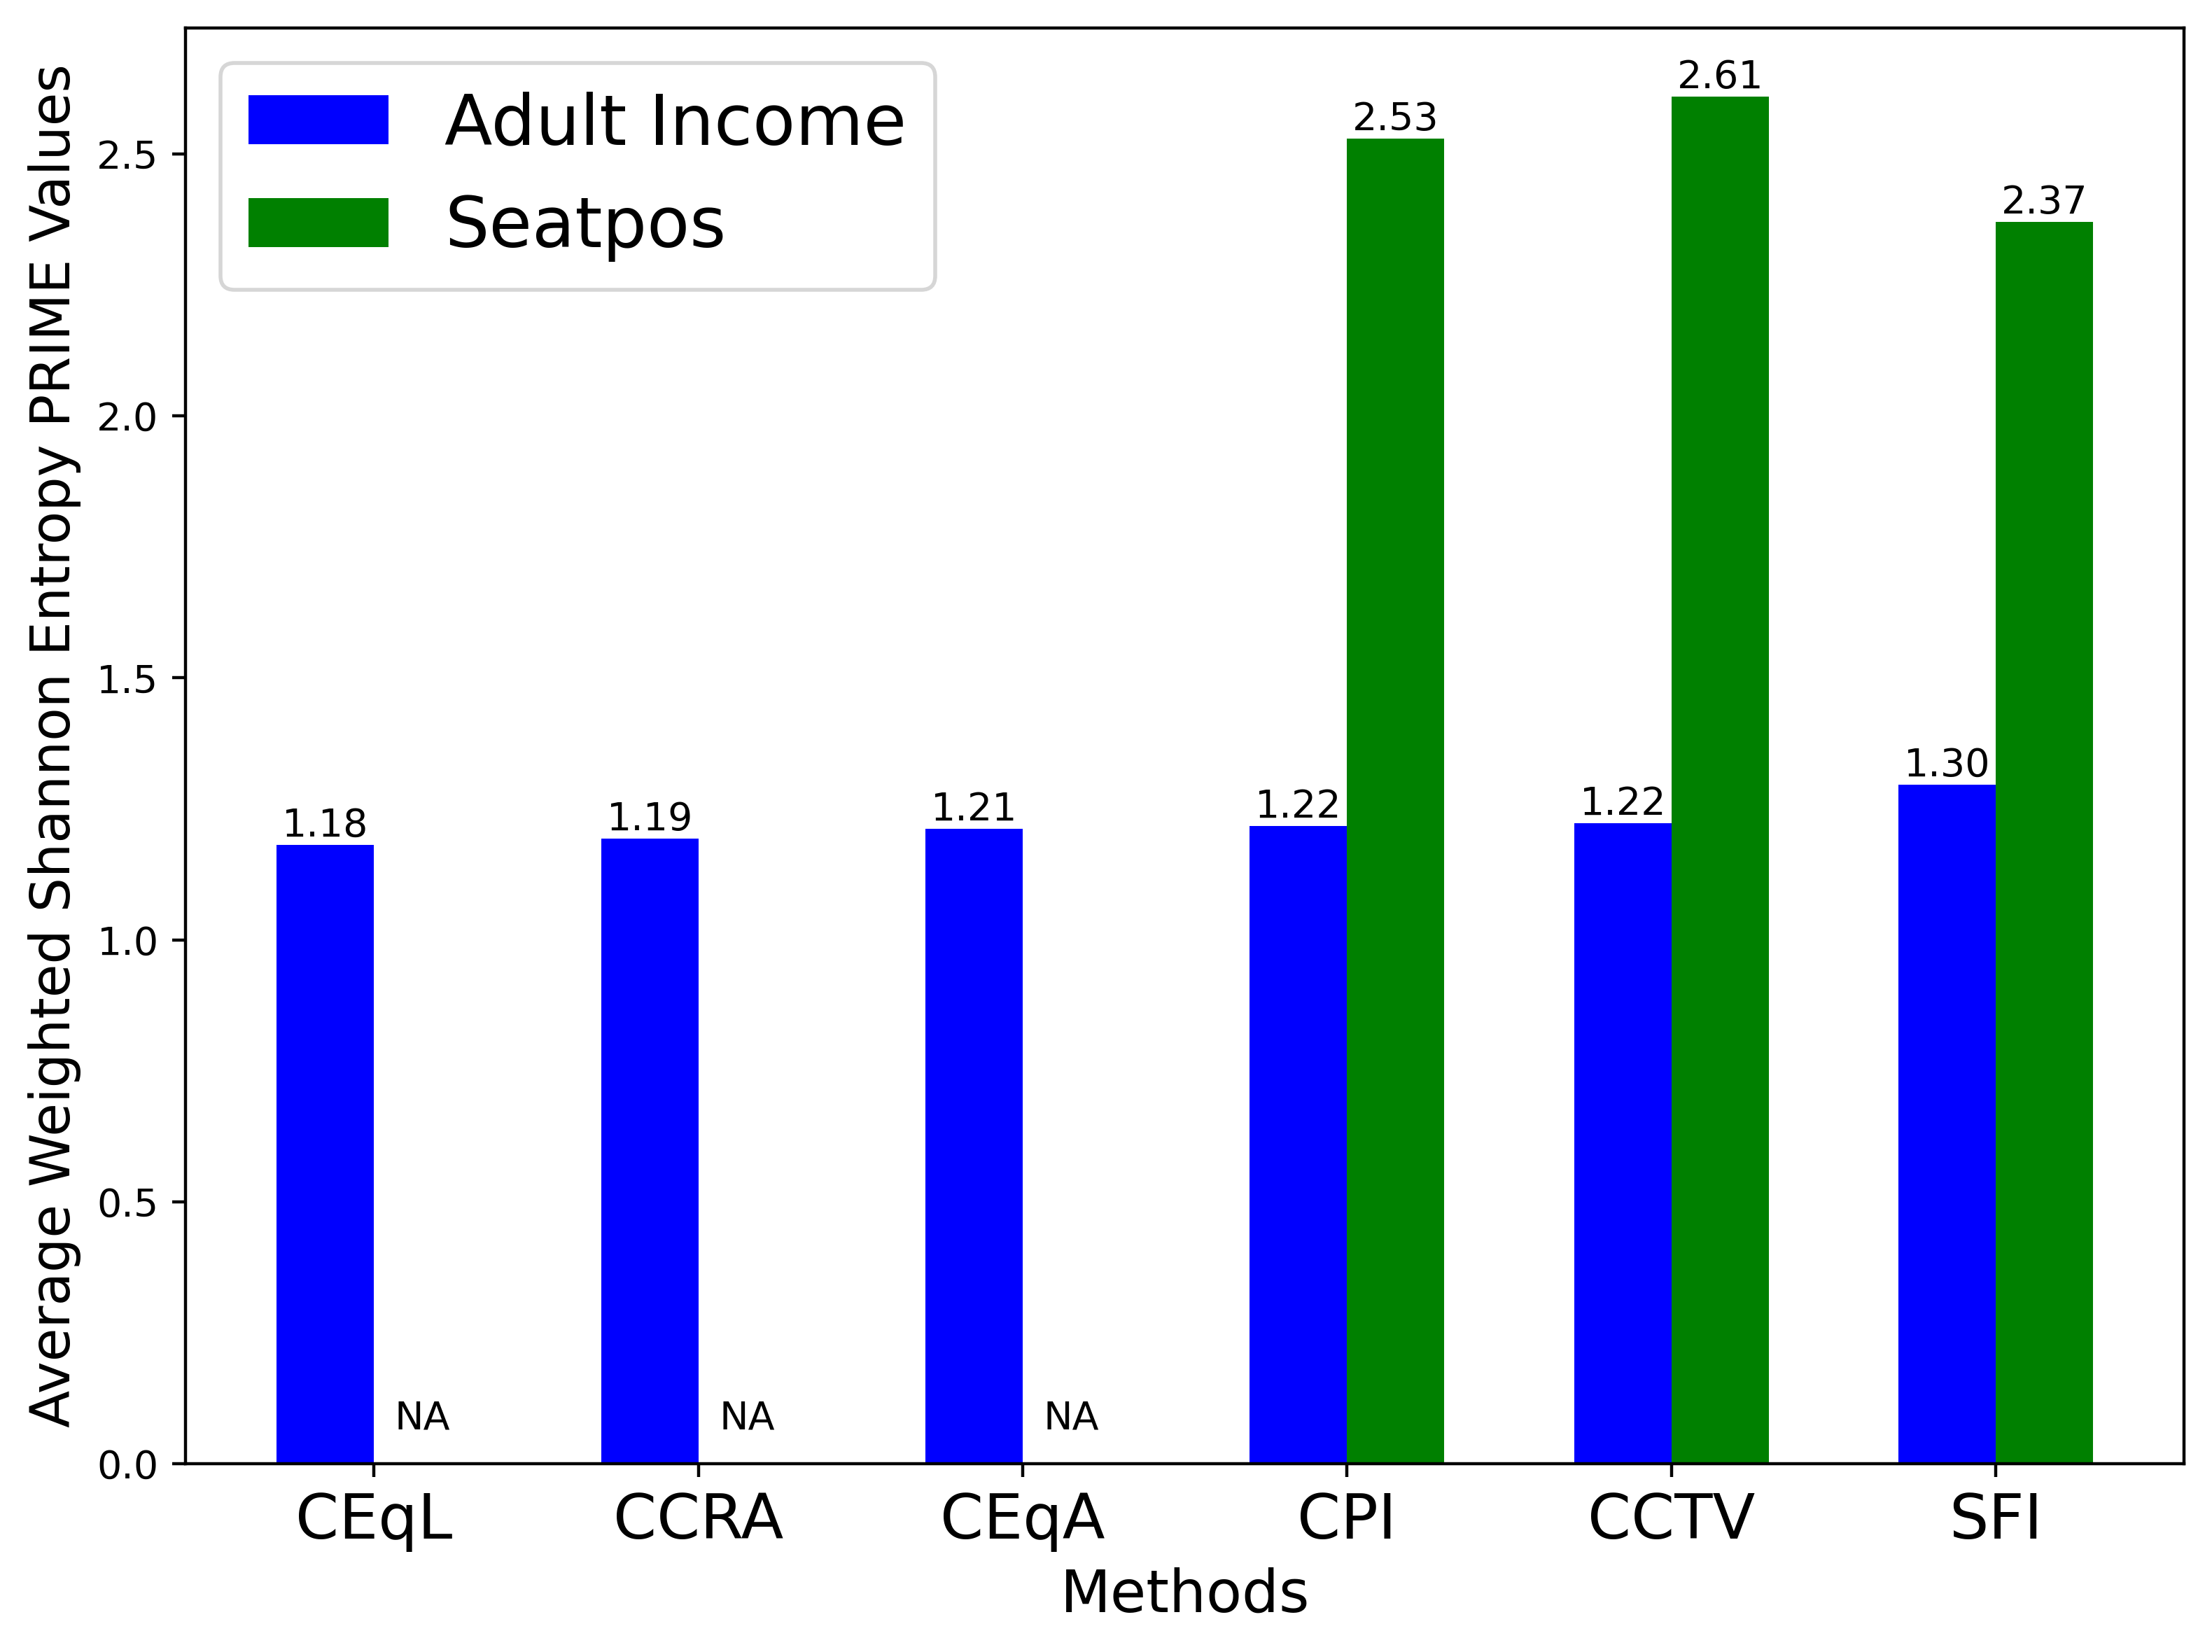

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

features = ["SFI", "CPI", "CEqA", "CEqL", "CCRA", "CCTV"]
averages = [1.295888889, 1.217777778, 1.212222222, 1.181111111, 1.193333333, 1.222222222]
averages_seatpos = [2.37, 2.53, np.nan, np.nan, np.nan, 2.61]  # Converted "NA" to np.nan

sorted_indices = np.argsort(averages)
sorted_features = np.array(features)[sorted_indices]
sorted_averages = np.array(averages)[sorted_indices]
sorted_averages_seatpos = np.array(averages_seatpos)[sorted_indices]

fig, ax = plt.subplots(figsize=(8, 6), dpi=400)

bar_width = 0.3

r1 = np.arange(len(sorted_averages))
r2 = r1 + bar_width

bars1 = ax.bar(r1, sorted_averages, width=bar_width, label='Adult Income', color='blue')
bars2 = ax.bar(r2, sorted_averages_seatpos, width=bar_width, label='Seatpos', color='green')

def add_labels(bars, data):
    for bar, value in zip(bars, data):
        height = bar.get_height()
        if np.isnan(value):
            ax.text(bar.get_x() + bar.get_width() / 2., 0.05, 'NA', ha='center', va='bottom')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2., height, f'{value:.2f}', ha='center', va='bottom')

add_labels(bars1, sorted_averages)
add_labels(bars2, sorted_averages_seatpos)

ax.set_xlabel('Methods', fontsize=15)
ax.set_ylabel('Average Weighted Shannon Entropy PRIME Values', fontsize=14)
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(sorted_features, fontsize=16)
ax.legend(fontsize=18, loc='upper left')

plt.tight_layout()
plt.savefig('all_entropies.png', bbox_inches='tight', dpi=450)
plt.show()


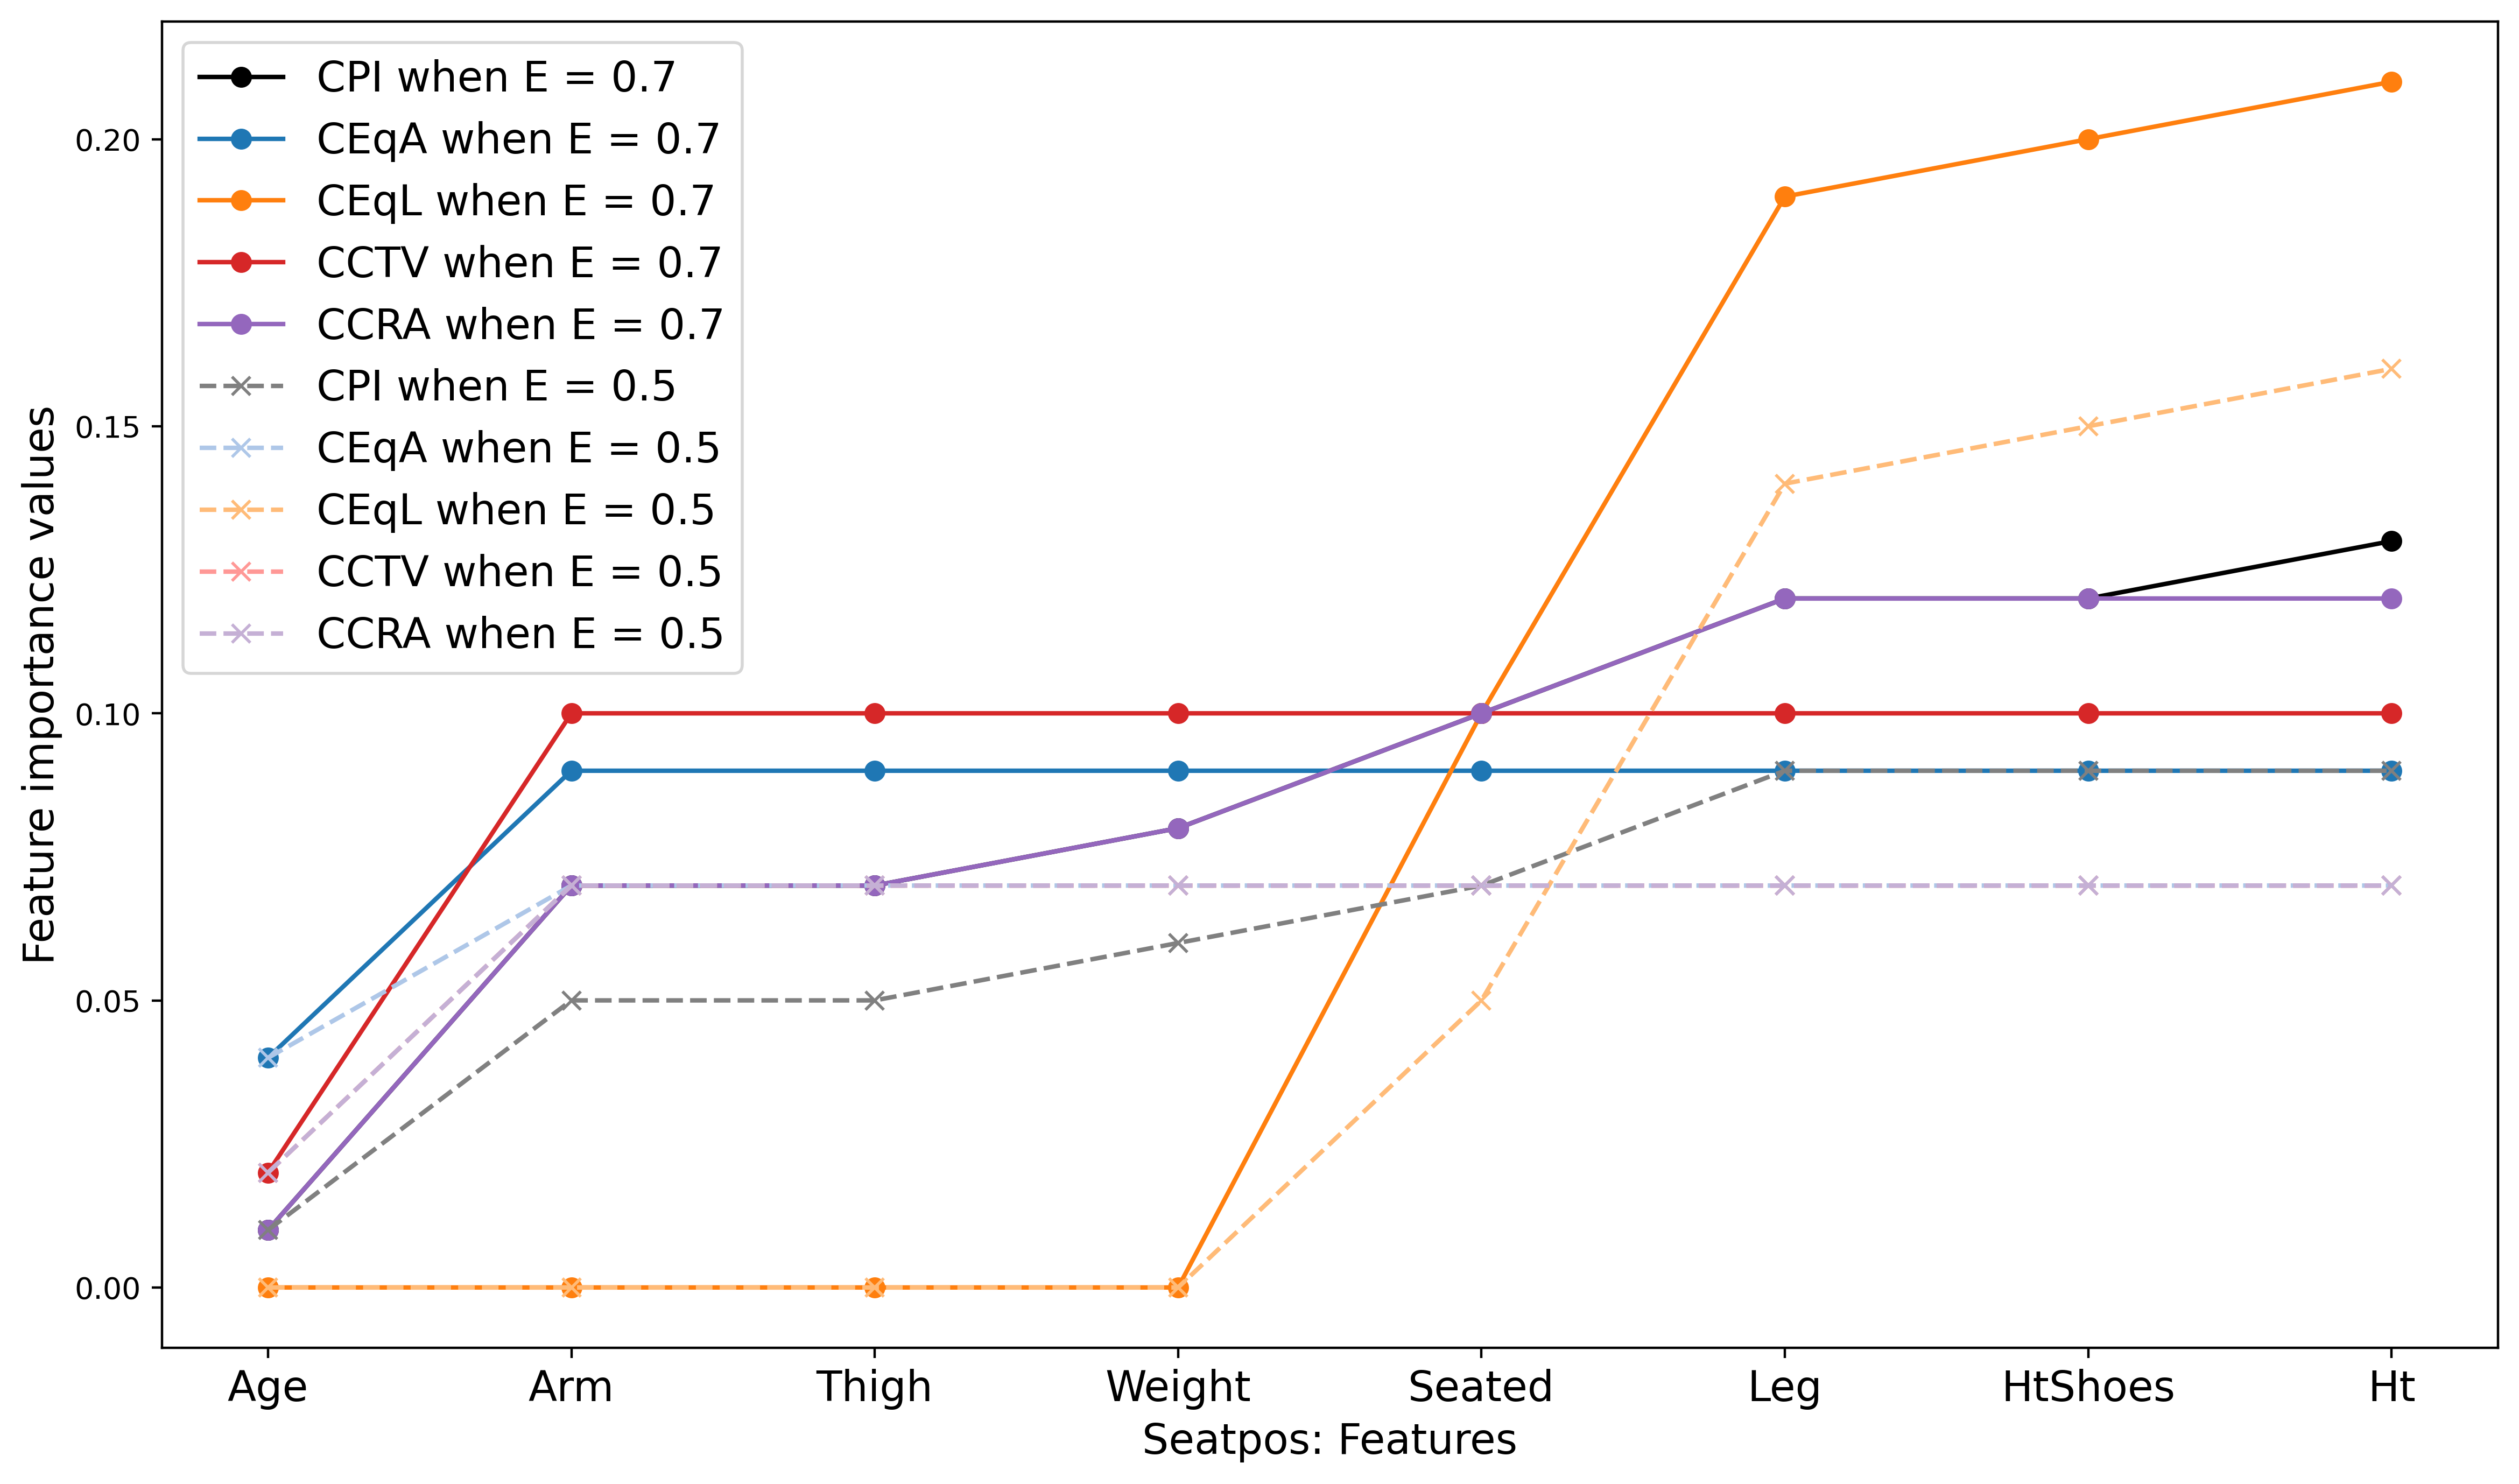

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the first set
data1 = {
    'Category': ['Age', 'Arm', 'Thigh', 'Weight', 'Seated', 'Leg', 'HtShoes', 'Ht'],
    'CPI': [0.01, 0.07, 0.07, 0.08, 0.1, 0.12, 0.12, 0.13],
    'CEqA': [0.04, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09],
    'CEqL': [0.00, 0.00, 0.00,  0.00, 0.1, 0.19, 0.2, 0.21],
    'CCTV': [0.02, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10],
    'CCRA': [0.01, 0.07, 0.07, 0.08, 0.1, 0.12, 0.12, 0.12]
}

# Data for the second set
data2 = {
    'Category': ['Age', 'Arm', 'Thigh', 'Weight', 'Seated', 'Leg', 'HtShoes', 'Ht'],
    'CPI': [0.01, 0.05, 0.05, 0.06, 0.07, 0.09, 0.09, 0.09],
    'CEqA': [0.04, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07],
    'CEqL': [0.00, 0.00, 0.00, 0.00, 0.05, 0.14, 0.15, 0.16],
    'CCTV': [0.02, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07],
    'CCRA': [0.02, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07]
}


df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)


colors = {
    'CPI when E = 0.7': '#000000',
    'CPI when E = 0.5': '#808080',
    'CEqA when E = 0.7': '#1f77b4',
    'CEqA when E = 0.5': '#aec7e8',
    'CEqL when E = 0.7': '#ff7f0e',
    'CEqL when E = 0.5': '#ffbb78',
    'CCTV when E = 0.7': '#d62728',
    'CCTV when E = 0.5': '#ff9896',
    'CCRA when E = 0.7': '#9467bd',
    'CCRA when E = 0.5': '#c5b0d5'
}

fig, ax = plt.subplots(figsize=(14, 8), dpi=400)

for col in df1.columns[1:]:
    ax.plot(df1['Category'], df1[col], marker='o', label=col + ' when E = 0.7', color=colors[col + ' when E = 0.7'])

for col in df2.columns[1:]:
    ax.plot(df2['Category'], df2[col], marker='x', linestyle='--', label=col + ' when E = 0.5', color=colors[col + ' when E = 0.5'])

ax.set_xlabel('Seatpos: Features',  fontsize=14)
ax.set_ylabel('Feature importance values',  fontsize=14)
plt.xticks(fontsize=14)
ax.legend(fontsize=14)

plt.savefig('feature_importance_e0.7_0.5_seatpos.png', dpi=400)

plt.show()


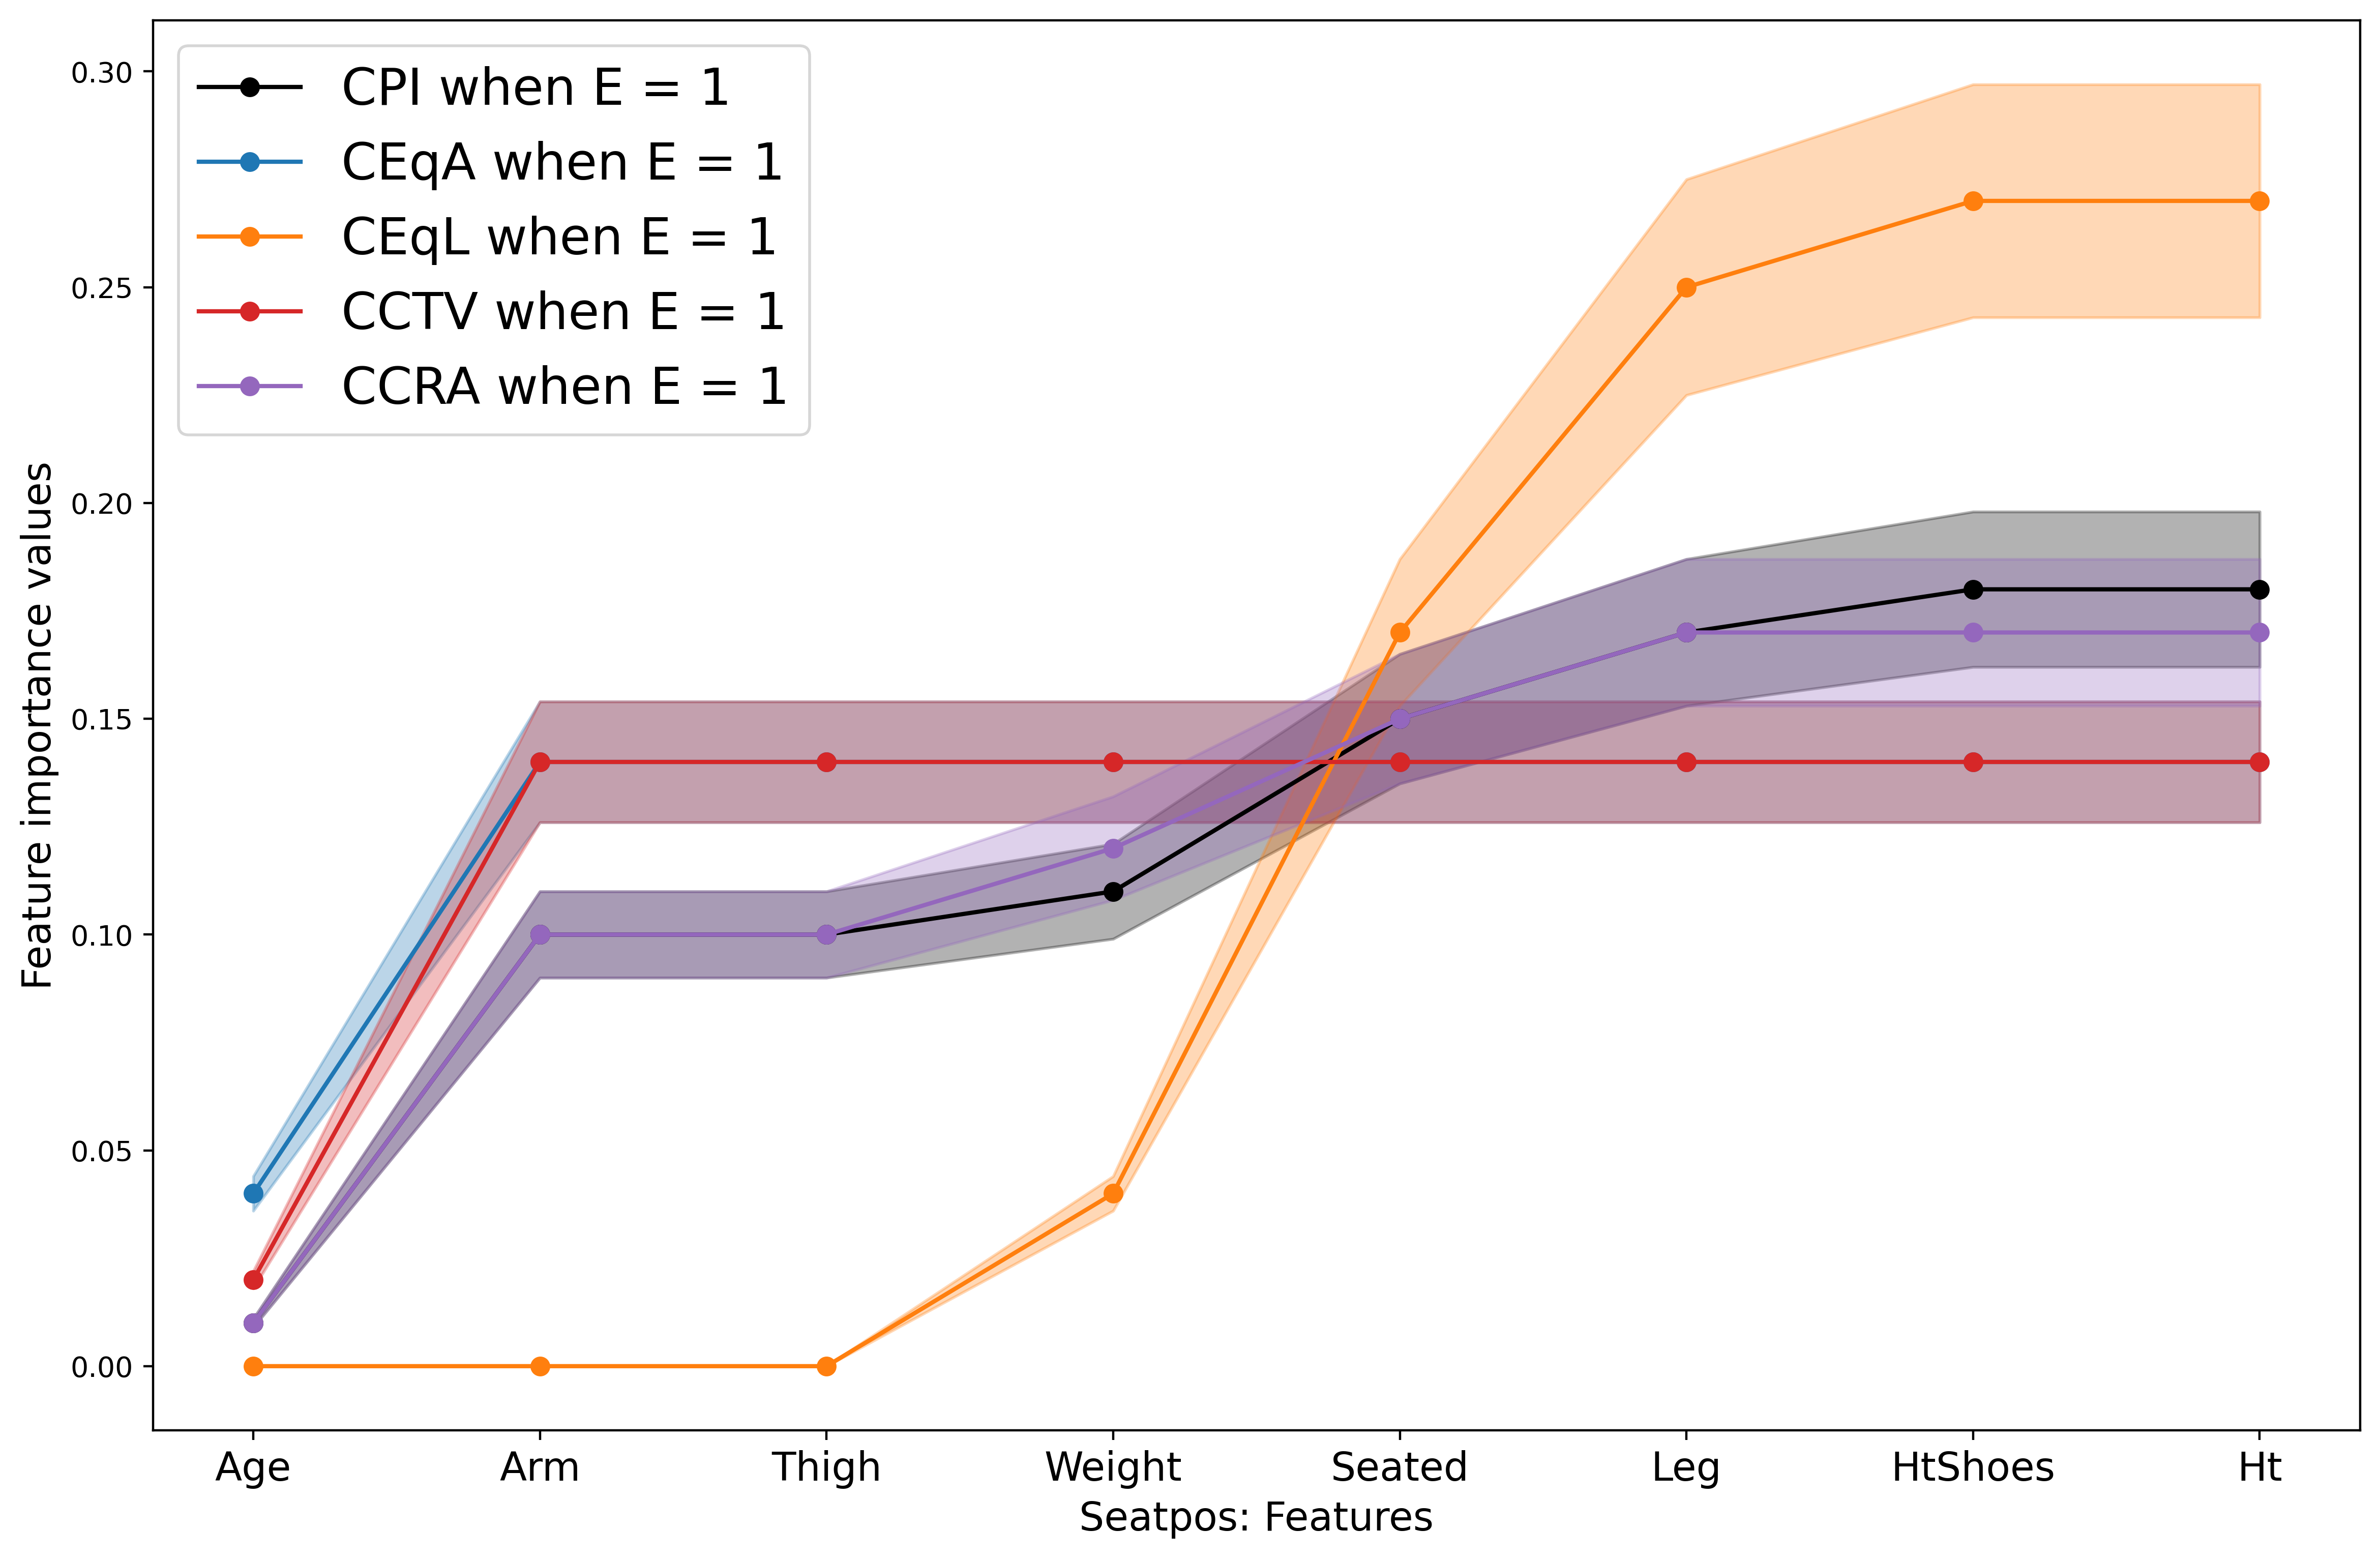

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    'Category': ['Age', 'Arm', 'Thigh', 'Weight', 'Seated', 'Leg', 'HtShoes', 'Ht'],
    'CPI when': [0.01, 0.10, 0.10, 0.11, 0.15, 0.17, 0.18, 0.18],
    'CEqA when': [0.04, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14],
    'CEqL when': [0.00, 0.00, 0.00, 0.04, 0.17, 0.25, 0.27, 0.27],
    'CCTV when': [0.02, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14],
    'CCRA when': [0.01, 0.1, 0.1, 0.12, 0.15, 0.17, 0.17, 0.17]
}

conf_intervals = {
    'CPI when': np.array([0.01, 0.10, 0.10, 0.11, 0.15, 0.17, 0.18, 0.18]) * 0.1,
    'CEqA when': np.array([0.04, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14]) * 0.1,
    'CEqL when': np.array([0.00, 0.00, 0.00, 0.04, 0.17, 0.25, 0.27, 0.27]) * 0.1,
    'CCTV when': np.array([0.02, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14]) * 0.1,
    'CCRA when': np.array([0.01, 0.1, 0.1, 0.12, 0.15, 0.17, 0.17, 0.17]) * 0.1
}

df = pd.DataFrame(data)


colors = {
    'CPI when': '#000000',
    'CEqA when': '#1f77b4',
    'CEqL when': '#ff7f0e',
    'CCTV when': '#d62728',
    'CCRA when': '#9467bd'
}

fig, ax = plt.subplots(figsize=(14, 9), dpi=400)

for col in df.columns[1:]:
    label = f"{col} E = 1"
    ax.plot(df['Category'], df[col], marker='o', label=label, color=colors[col])
    ax.fill_between(df['Category'], df[col] - conf_intervals[col], df[col] + conf_intervals[col],
                    color=colors[col], alpha=0.3)

ax.set_xlabel('Seatpos: Features',  fontsize=14)
ax.set_ylabel('Feature importance values',  fontsize=14)
plt.xticks(fontsize=14)
ax.legend(fontsize=18)
plt.savefig('feature_importance_e1_seatpos.png', dpi=400)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    'Category': ['race', 'nativeCountry', 'workclass', 'sex', 'hoursPerWeek', 'age', 'occupation', 'education', 'marital_status'],
    'CPI': [0.02, 0.02, 0.03, 0.08, 0.08, 0.08, 0.19, 0.19, 0.32],
    'CEA': [0.01, 0.01, 0.02, 0.05, 0.05, 0.05, 0.12, 0.12, 0.19],
    'CEL': [0.05, 0.05, 0.06, 0.09, 0.09, 0.09, 0.16, 0.16, 0.24],
    'CCTV': [0.05, 0.05, 0.06, 0.09, 0.09, 0.09, 0.16, 0.16, 0.24],
    'RA': [0.01, 0.01, 0.02, 0.05, 0.05, 0.05, 0.12, 0.12, 0.19]
}

conf_intervals = {
    'CPI': np.array([0.02, 0.02, 0.03, 0.08, 0.08, 0.08, 0.19, 0.19, 0.32]) * 0.1,
    'CEA': np.array([0.01, 0.01, 0.02, 0.05, 0.05, 0.05, 0.12, 0.12, 0.19]) * 0.1,
    'CEL': np.array([0.05, 0.05, 0.06, 0.09, 0.09, 0.09, 0.16, 0.16, 0.24]) * 0.1,
    'CCTV': np.array([0.05, 0.05, 0.06, 0.09, 0.09, 0.09, 0.16, 0.16, 0.24]) * 0.1,
    'RA': np.array([0.01, 0.01, 0.02, 0.05, 0.05, 0.05, 0.12, 0.12, 0.19]) * 0.1
}

df = pd.DataFrame(data)

colors = {
    'CPI': '#e41a1c',
    'CEA': '#377eb8',
    'CEL': '#4daf4a',
    'CCTV': '#f58231',
    'RA': '#911eb4'
}

fig, ax = plt.subplots(figsize=(14, 8), dpi=400)

for col in df.columns[1:]:
    label = f"{col} when E = 1"
    ax.plot(df['Category'], df[col], marker='o', label=label, color=colors[col])
    ax.fill_between(df['Category'], df[col] - conf_intervals[col], df[col] + conf_intervals[col],
                    color=colors[col], alpha=0.3)

ax.set_xlabel('Seatpos: Features', fontsize=14)
ax.set_ylabel('Feature importance values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(fontsize=18)
plt.savefig('FI_E_1_adult.png', dpi=500)

plt.show()


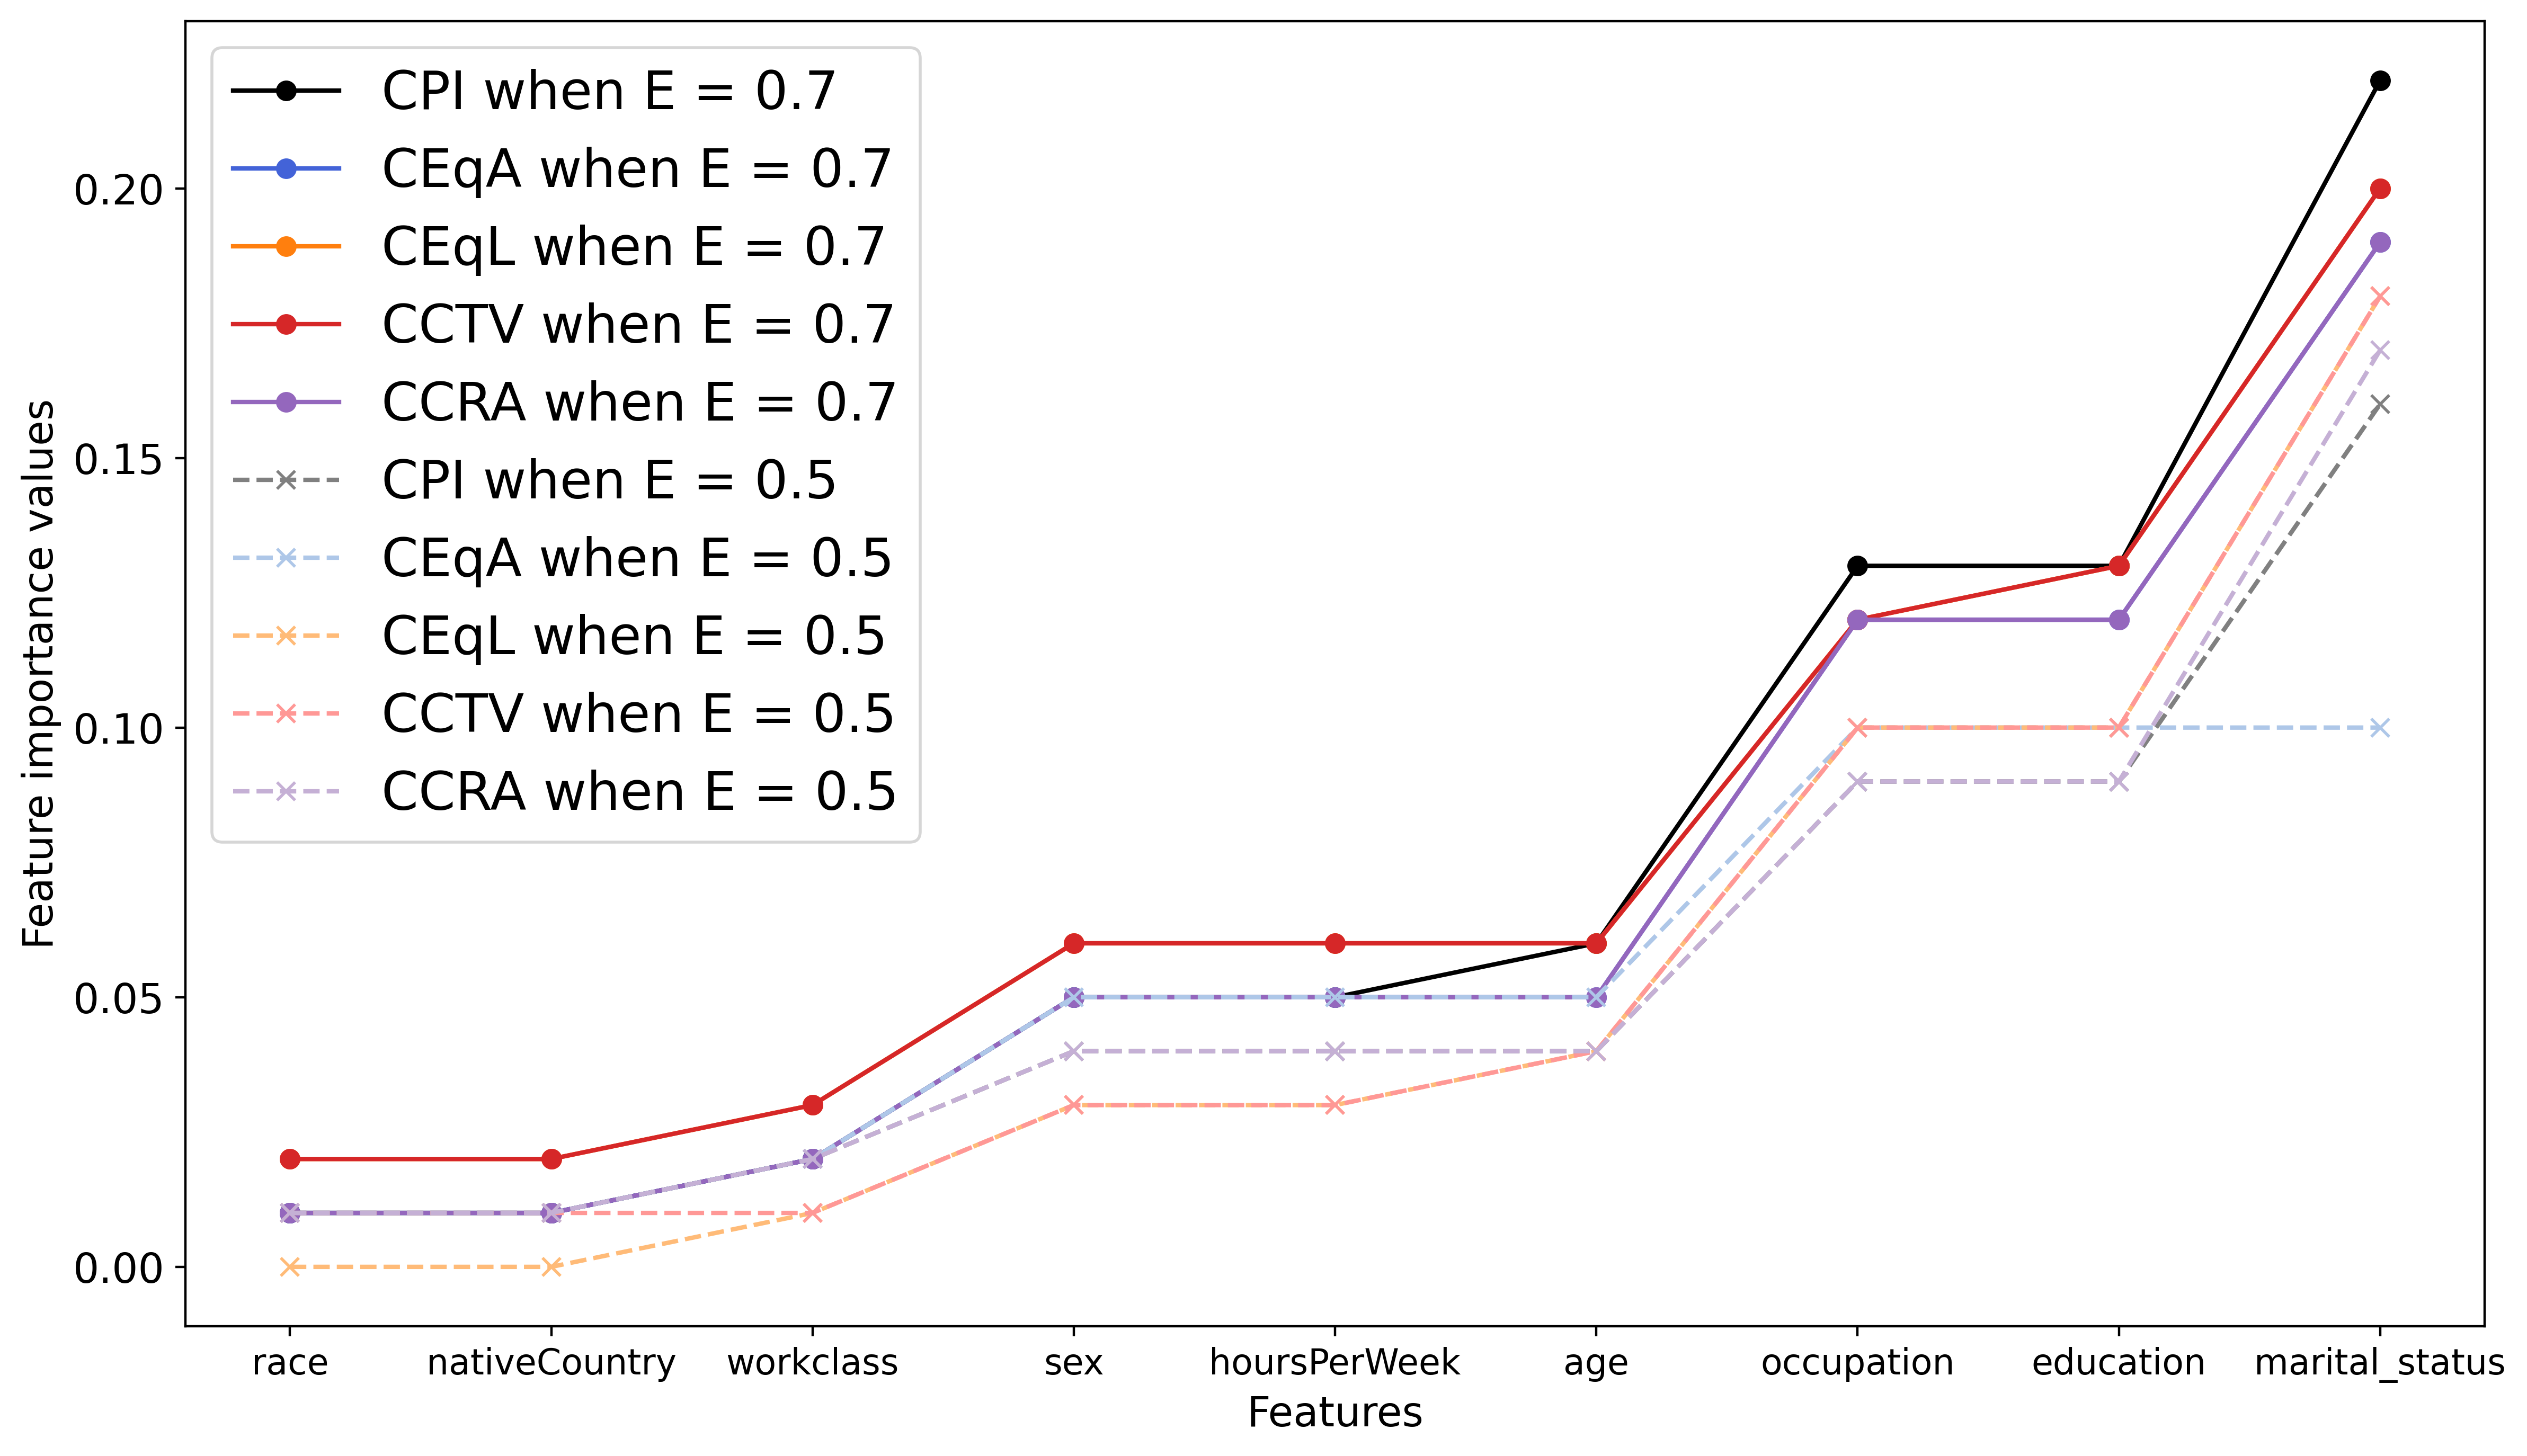

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data1 = {
    'Category': ['race', 'nativeCountry', 'workclass', 'sex', 'hoursPerWeek', 'age', 'occupation', 'education', 'marital_status'],
    'CPI': [0.01, 0.01, 0.02, 0.04, 0.04, 0.04, 0.09, 0.09, 0.16],
    'CEqA': [0.01, 0.01, 0.02, 0.05, 0.05, 0.05, 0.10, 0.10, 0.10],
    'CEqL': [0.00, 0.00, 0.01, 0.03, 0.03, 0.04, 0.10, 0.10, 0.18],
    'CCTV': [0.01, 0.01, 0.01, 0.03, 0.03, 0.04, 0.10, 0.10, 0.18],
    'CCRA': [0.01, 0.01, 0.02, 0.04, 0.04, 0.04, 0.09, 0.09, 0.17]
}

data2 = {
    'Category': ['race', 'nativeCountry', 'workclass', 'sex', 'hoursPerWeek', 'age', 'occupation', 'education', 'marital_status'],
    'CPI': [0.01, 0.01, 0.02, 0.05, 0.05, 0.06, 0.13, 0.13, 0.22],
    'CEqA': [0.01, 0.01, 0.02, 0.05, 0.05, 0.05, 0.12, 0.12, 0.19],
    'CEqL': [0.02, 0.02, 0.03, 0.06, 0.06, 0.06, 0.12, 0.13, 0.20],
    'CCTV': [0.02, 0.02, 0.03, 0.06, 0.06, 0.06, 0.12, 0.13, 0.20],
    'CCRA': [0.01, 0.01, 0.02, 0.05, 0.05, 0.05, 0.12, 0.12, 0.19]
}

df2 = pd.DataFrame(data1)
df1 = pd.DataFrame(data2)

colors = {
    'CPI when E = 0.7': '#000000',
    'CPI when E = 0.5': '#808080',  )
    'CEqA when E = 0.7':  '#4363d8',
    'CEqA when E = 0.5': '#aec7e8',
    'CEqL when E = 0.7': '#ff7f0e',
    'CEqL when E = 0.5': '#ffbb78',
    'CCTV when E = 0.7': '#d62728',
    'CCTV when E = 0.5': '#ff9896',
    'CCRA when E = 0.7': '#9467bd',
    'CCRA when E = 0.5': '#c5b0d5'
}

fig, ax = plt.subplots(figsize=(14, 8), dpi=400)
for col in df1.columns[1:]:
    ax.plot(df1['Category'], df1[col], marker='o', label=col + ' when E = 0.7', color=colors[col + ' when E = 0.7'])
for col in df2.columns[1:]:
    ax.plot(df2['Category'], df2[col], marker='x', linestyle='--', label=col + ' when E = 0.5', color=colors[col + ' when E = 0.5'])

ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Feature importance values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
ax.legend(fontsize=18)
plt.savefig('FI_E0.5_0.07_adult.png', dpi=400)

plt.show()
